# SPARC-4 Pipeline Tools
## Night:``2023-06-06``
## Modes: ``PHOTOMETRY`` and ``POLARIMETRY``
***

This notebook shows an example of the full reduction of the SPARC4 data  in the [minidata package](https://drive.google.com/file/d/1tAVjyhYGMDcrU5sDdGCmd_f5HoazZ294/view?usp=drive_link)  using the SPARC4 pipeline tools. 

* Author: Eder Martioli, LNA 18 Apr 2024

In [1]:
import os, sys
import sparc4.product_plots as s4plt
import sparc4.pipeline_lib as s4pipelib
import sparc4.utils as s4utils
import glob
import warnings
warnings.filterwarnings('ignore')

## User inputs and initial setup

Before starting the reduction, we must configure a few parameters. The pipeline comes with default values for all parameters. To modify these, one can create and edit their own parameter file, then load it into the ``PARAMS_FILE`` variable. Alternatively, parameters can be changed by directly resetting the dictionary entry for a specific parameter, like this: ``p['PARAM_NAME'] = PARAM_NEW_VALUE``. See examples below.

In [2]:
# set night directory name
NIGHTDIR = '20230606'
# set raw data root directory
ROOTDATADIR =  "/Users/eder/Data/SPARC4/minidata/"
# set reduced data root directory
ROOTREDUCEDDIR = "/Users/eder/Data/SPARC4/minidata/reduced/"
# set reduced data root directory
PIPELINEDIR = "/Users/eder/sparc4-pipeline/"
# define path to default calibration directory
calibdb_dir = os.path.join(PIPELINEDIR, "calibdb/")

# set path to the parameters file:
#PARAMS_FILE = ""  # to use deafult values
PARAMS_FILE = "{}/user_files/my_params.yaml".format(PIPELINEDIR)

# set path to a target list file
# this is to force targets to be included in the source catalog in addition to those detected automatically
#TARGET_LIST_FILE = os.path.join(PIPELINEDIR,"user_files/targets.csv")

# select a SPARC4 channel: 1 (g), 2 (r), 3 (i) or 4 (z)
CHANNEL = 4

# initialize pipeline parameters
p = s4pipelib.init_s4_p(NIGHTDIR,
                        ROOTDATADIR,
                        ROOTREDUCEDDIR,
                        print_report=False,
                        param_file=PARAMS_FILE)

# get data dir
datadir = p['data_directories'][CHANNEL-1]
# get reduce dir
reducedir = p['reduce_directories'][CHANNEL-1]

# to force reduction even if products already exist
FORCE = False

###############################################################
# Below are a few examples on how to manually reset parameters: 
###############################################################

# set astrometry reference image as the one for this channel
p["ASTROM_REF_IMG"] = os.path.join(calibdb_dir, p["ASTROM_REF_IMGS"][CHANNEL-1])

# to build stacks of 10 images instead of the default value of 16 images
p['NFILES_FOR_STACK'] = 10

# to change the S/N threshold for detecting sources
# -- note that lower values will result in more (fainter) sources being detected.
p['PHOT_THRESHOLD'] = 100

# uncomment below to print all parameters and their respective values:
#for key in p.keys():
#    print("p['{}']={}".format(key,p[key]))

***
# <font color='darkblue'>Bias and Flat-field calibrations</font> 

In this section we build the master bias and flat-field calibrations.

## Define input list and output product file names

In [3]:
# create a list of zeros for current detector mode
zero_list = glob.glob("{}/{}".format(datadir,"*zero*.fits"))

# define file name of master bias 
p["master_bias"] = "{}/{}_s4c{}_MasterZero.fits".format(reducedir,
                                                   NIGHTDIR,
                                                   CHANNEL)

# create a list of flats for current detector mode
flat_list = glob.glob("{}/{}".format(datadir,"*dflat*.fits"))

# define file name of master flat
p["master_flat"] = "{}/{}_s4c{}_MasterDomeFlat.fits".format(reducedir,
                                                   NIGHTDIR,
                                                   CHANNEL)

# Run master calibration

The master calibration routine combines a list of calibration files into a master calibration image.

In [4]:
# calculate master bias and save product to FITS
p = s4pipelib.run_master_calibration(p, 
                                     inputlist=zero_list, 
                                     output=p["master_bias"], 
                                     obstype='bias', 
                                     data_dir=datadir, 
                                     reduce_dir=reducedir, 
                                     force=FORCE)

2024-04-24 20:43:40,681 root - INFO - bias files: 3  [pipeline_lib]


2024-04-24 20:43:40,681 | INFO | bias files: 3


2024-04-24 20:43:40,732 root - INFO - gain:3.36 electron / adu  [pipeline_lib]


2024-04-24 20:43:40,732 | INFO | gain:3.36 electron / adu


2024-04-24 20:43:40,732 root - INFO - processing frame 1 of 3  [pipeline_lib]


2024-04-24 20:43:40,732 | INFO | processing frame 1 of 3


2024-04-24 20:43:40,841 root - INFO - processing frame 2 of 3  [pipeline_lib]


2024-04-24 20:43:40,841 | INFO | processing frame 2 of 3


2024-04-24 20:43:40,941 root - INFO - processing frame 3 of 3  [pipeline_lib]


2024-04-24 20:43:40,941 | INFO | processing frame 3 of 3


2024-04-24 20:43:41,055 astropop - INFO - Combining 3 images with median method.  [imcombine]


2024-04-24 20:43:41,055 | INFO | Combining 3 images with median method.


2024-04-24 20:43:41,131 root - INFO - Normalization mean value:1680.9159173583987 electron  [pipeline_lib]


2024-04-24 20:43:41,131 | INFO | Normalization mean value:1680.9159173583987 electron


In [5]:
# calculate master dome flat and save product to FITS
p = s4pipelib.run_master_calibration(p, 
                                     inputlist=flat_list, 
                                     output=p["master_flat"], 
                                     obstype='flat', 
                                     data_dir=datadir, 
                                     reduce_dir=reducedir, 
                                     normalize=True, 
                                     force=FORCE)

2024-04-24 20:43:46,797 root - INFO - flat files: 3  [pipeline_lib]


2024-04-24 20:43:46,797 | INFO | flat files: 3


2024-04-24 20:43:46,850 root - INFO - gain:3.36 electron / adu  [pipeline_lib]


2024-04-24 20:43:46,850 | INFO | gain:3.36 electron / adu


2024-04-24 20:43:46,851 root - INFO - processing frame 1 of 3  [pipeline_lib]


2024-04-24 20:43:46,851 | INFO | processing frame 1 of 3


2024-04-24 20:43:46,953 root - INFO - processing frame 2 of 3  [pipeline_lib]


2024-04-24 20:43:46,953 | INFO | processing frame 2 of 3


2024-04-24 20:43:47,049 root - INFO - processing frame 3 of 3  [pipeline_lib]


2024-04-24 20:43:47,049 | INFO | processing frame 3 of 3


2024-04-24 20:43:47,162 astropop - INFO - Combining 3 images with median method.  [imcombine]


2024-04-24 20:43:47,162 | INFO | Combining 3 images with median method.


2024-04-24 20:43:47,232 root - INFO - Normalization mean value:56489.83415908813 electron  [pipeline_lib]


2024-04-24 20:43:47,232 | INFO | Normalization mean value:56489.83415908813 electron


# Plot master calibration results

Now, we plot the results to check if they look fine. 

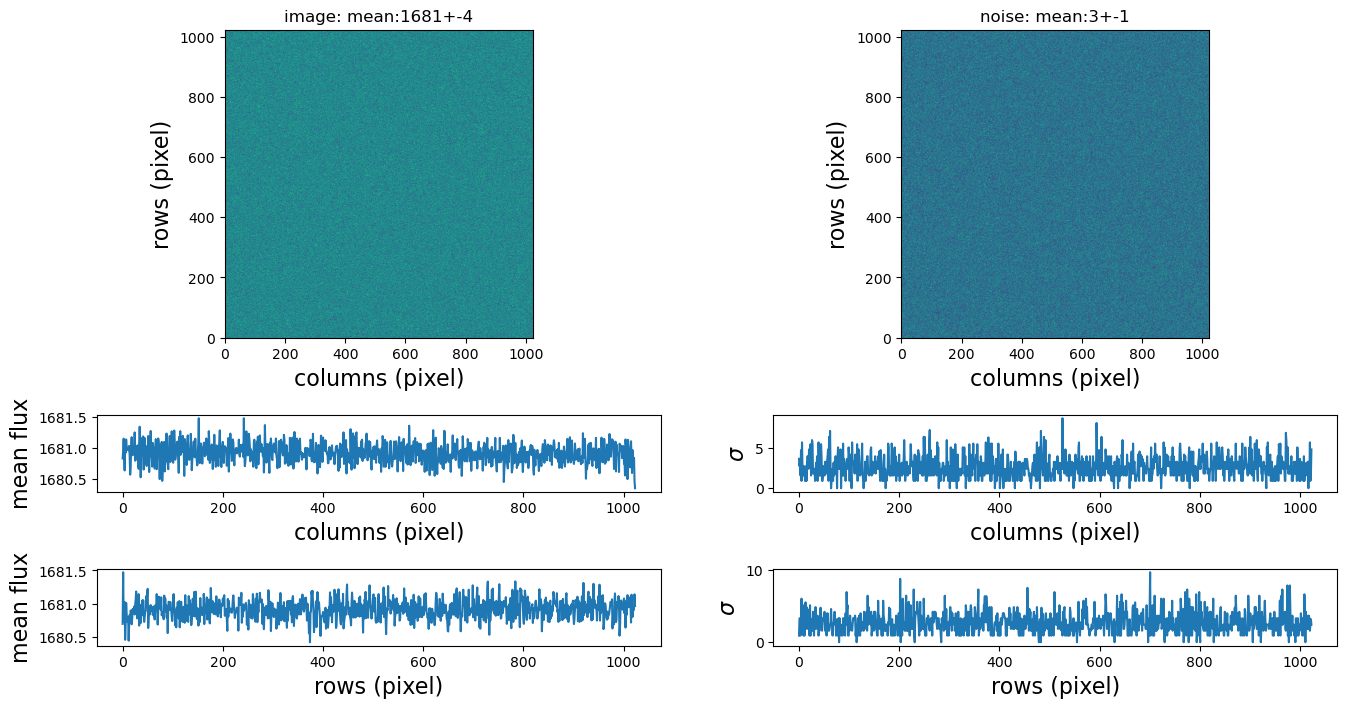

In [6]:
# plot master bias
s4plt.plot_cal_frame(p["master_bias"], 
                     percentile=99.5, 
                     combine_rows=True, 
                     combine_cols=True)

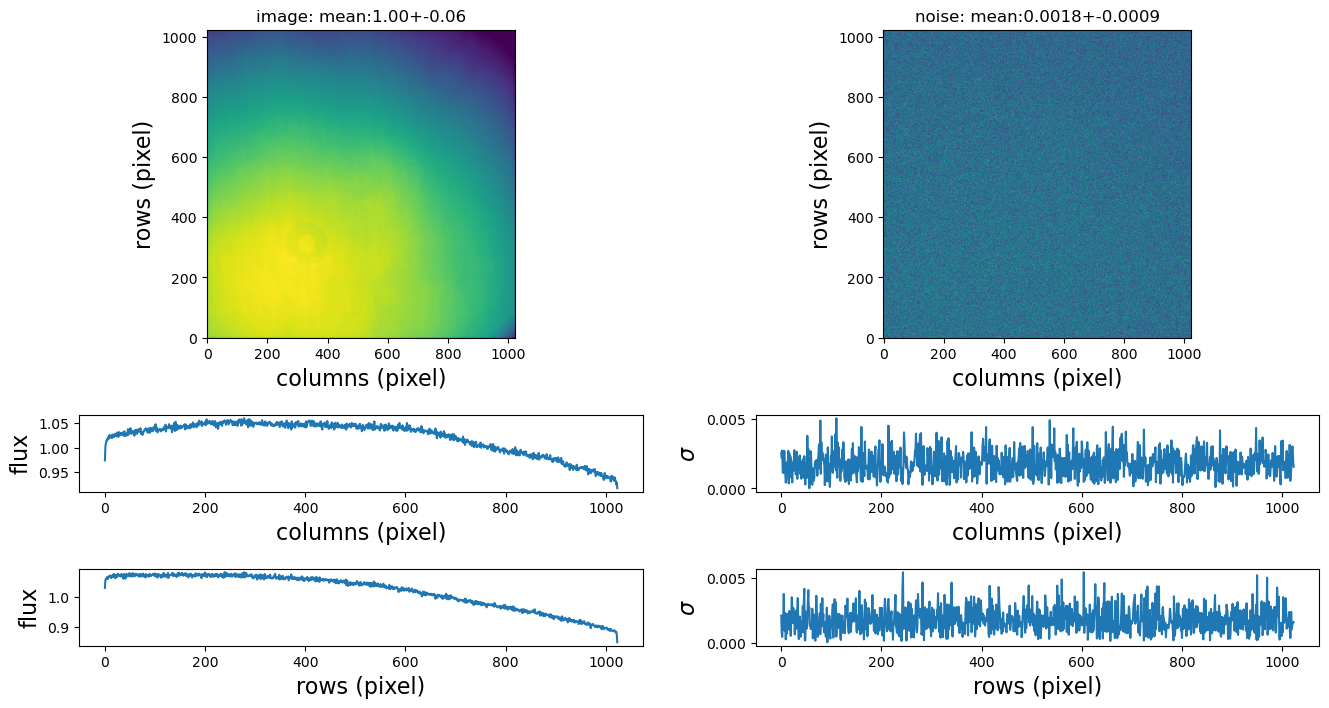

In [7]:
# plot master flat
s4plt.plot_cal_frame(p["master_flat"], 
                     percentile=99.5, 
                     xcut=512, 
                     ycut=512)

***
# <font color='darkblue'>Science image reduction</font> 

In this section we reduce the science data. In this example we show the reductiion processes for the following observations:

* The photometric standard [LTT 4816](https://simbad.u-strasbg.fr/simbad/sim-basic?Ident=ltt4816&submit=SIMBAD+search) observed in photometric mode. 
* The polarimetric standard [HD 111579](https://simbad.u-strasbg.fr/simbad/sim-basic?Ident=HD+111579&submit=SIMBAD+search) observed in polarimetric mode.  It was observed in 16 rotating positions of the waveplate, equally spaced by 22.5 degrees, utilizing both L/2 and L/4 waveplate retarders.

## `PHOTOMETRIC` mode

### Select LTT 4816 data

In [8]:
# set an object ID matching the ID in the image header keyword 'OBJECT'
OBJECTID = "ltt4816"  # LTT 4816 is a spectro-photometric standard

# set suffix for output stack filename
stack_suffix = "{}_s4c{}_{}".format(NIGHTDIR, 
                                    CHANNEL, 
                                    OBJECTID.replace(" ",""))
# create a list of science data 
sci_list = glob.glob("{}/{}".format(datadir,"*ltt4816.fits"))

### Reduce LTT 4816 data

To reduce scientific frames, run the routine ``s4pipelib.stack_and_reduce_sci_images``. This routine performs calibration for detector gain, bias, and flat-field. Then, a subset of frames is stacked to generate a stack product. Source detection is then conducted within the stack frame, and the identified sources are cross-referenced with a catalog to establish an astrometric solution and generate a master catalog for all input observations of this field. Aperture photometry is computed for several aperture sizes across all sources and for all input image frames. Finally, the resulting calibrated images and their associated photometric catalogs are saved into ``proc.fits`` product FITS files.

2024-04-24 20:43:58,488 root - INFO - Reference image: /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000013_ltt4816.fits  [pipeline_lib]


2024-04-24 20:43:58,488 | INFO | Reference image: /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000013_ltt4816.fits


2024-04-24 20:43:58,523 root - INFO - OBJECT files: 7  [pipeline_lib]


2024-04-24 20:43:58,523 | INFO | OBJECT files: 7


2024-04-24 20:43:58,523 root - INFO - Loading science frames to memory ...   [pipeline_lib]


2024-04-24 20:43:58,523 | INFO | Loading science frames to memory ... 


2024-04-24 20:43:58,623 root - INFO - gain:3.36 electron / adu  [pipeline_lib]


2024-04-24 20:43:58,623 | INFO | gain:3.36 electron / adu


2024-04-24 20:43:58,624 root - INFO - Calibrating science frames (CR, gain, bias, flat) ...   [pipeline_lib]


2024-04-24 20:43:58,624 | INFO | Calibrating science frames (CR, gain, bias, flat) ... 


2024-04-24 20:43:58,624 root - INFO - Calibrating science frame 1 of 7 : 20230606_s4c4_000013_ltt4816.fits   [pipeline_lib]


2024-04-24 20:43:58,624 | INFO | Calibrating science frame 1 of 7 : 20230606_s4c4_000013_ltt4816.fits 


2024-04-24 20:43:59,000 root - INFO - Calibrating science frame 2 of 7 : 20230606_s4c4_000014_ltt4816.fits   [pipeline_lib]


2024-04-24 20:43:59,000 | INFO | Calibrating science frame 2 of 7 : 20230606_s4c4_000014_ltt4816.fits 


2024-04-24 20:43:59,377 root - INFO - Calibrating science frame 3 of 7 : 20230606_s4c4_000015_ltt4816.fits   [pipeline_lib]


2024-04-24 20:43:59,377 | INFO | Calibrating science frame 3 of 7 : 20230606_s4c4_000015_ltt4816.fits 


2024-04-24 20:43:59,764 root - INFO - Calibrating science frame 4 of 7 : 20230606_s4c4_000012_ltt4816.fits   [pipeline_lib]


2024-04-24 20:43:59,764 | INFO | Calibrating science frame 4 of 7 : 20230606_s4c4_000012_ltt4816.fits 


2024-04-24 20:44:00,149 root - INFO - Calibrating science frame 5 of 7 : 20230606_s4c4_000009_ltt4816.fits   [pipeline_lib]


2024-04-24 20:44:00,149 | INFO | Calibrating science frame 5 of 7 : 20230606_s4c4_000009_ltt4816.fits 


2024-04-24 20:44:00,521 root - INFO - Calibrating science frame 6 of 7 : 20230606_s4c4_000010_ltt4816.fits   [pipeline_lib]


2024-04-24 20:44:00,521 | INFO | Calibrating science frame 6 of 7 : 20230606_s4c4_000010_ltt4816.fits 


2024-04-24 20:44:00,898 root - INFO - Calibrating science frame 7 of 7 : 20230606_s4c4_000011_ltt4816.fits   [pipeline_lib]


2024-04-24 20:44:00,898 | INFO | Calibrating science frame 7 of 7 : 20230606_s4c4_000011_ltt4816.fits 


2024-04-24 20:44:01,281 root - INFO - Registering science frames and stacking them ...   [pipeline_lib]


2024-04-24 20:44:01,281 | INFO | Registering science frames and stacking them ... 


2024-04-24 20:44:01,281 root - INFO - Selected file for stack:0 /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000013_ltt4816.fits  [pipeline_lib]


2024-04-24 20:44:01,281 | INFO | Selected file for stack:0 /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000013_ltt4816.fits


2024-04-24 20:44:01,283 root - INFO - Selected file for stack:1 /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000014_ltt4816.fits  [pipeline_lib]


2024-04-24 20:44:01,283 | INFO | Selected file for stack:1 /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000014_ltt4816.fits


2024-04-24 20:44:01,285 root - INFO - Selected file for stack:2 /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000015_ltt4816.fits  [pipeline_lib]


2024-04-24 20:44:01,285 | INFO | Selected file for stack:2 /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000015_ltt4816.fits


2024-04-24 20:44:01,286 root - INFO - Selected file for stack:3 /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000012_ltt4816.fits  [pipeline_lib]


2024-04-24 20:44:01,286 | INFO | Selected file for stack:3 /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000012_ltt4816.fits


2024-04-24 20:44:01,289 root - INFO - Selected file for stack:4 /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000009_ltt4816.fits  [pipeline_lib]


2024-04-24 20:44:01,289 | INFO | Selected file for stack:4 /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000009_ltt4816.fits


2024-04-24 20:44:01,291 root - INFO - Selected file for stack:5 /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000010_ltt4816.fits  [pipeline_lib]


2024-04-24 20:44:01,291 | INFO | Selected file for stack:5 /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000010_ltt4816.fits


2024-04-24 20:44:01,292 root - INFO - Selected file for stack:6 /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000011_ltt4816.fits  [pipeline_lib]


2024-04-24 20:44:01,292 | INFO | Selected file for stack:6 /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000011_ltt4816.fits


2024-04-24 20:44:01,297 astropop - INFO - Registering image 1 from 7  [register]


2024-04-24 20:44:01,297 | INFO | Registering image 1 from 7


2024-04-24 20:44:01,299 astropop - INFO - Images are equal, skipping registering.  [register]


2024-04-24 20:44:01,299 | INFO | Images are equal, skipping registering.


2024-04-24 20:44:01,383 astropop - INFO - Registering image 2 from 7  [register]


2024-04-24 20:44:01,383 | INFO | Registering image 2 from 7


2024-04-24 20:44:01,471 astropop - INFO - Filling registered image with cval=546.36  [register]


2024-04-24 20:44:01,471 | INFO | Filling registered image with cval=546.36


2024-04-24 20:44:01,472 astropop - INFO - Registering image with: translation=[0.75 0.25], rotation=0.00°  [register]


2024-04-24 20:44:01,472 | INFO | Registering image with: translation=[0.75 0.25], rotation=0.00°


2024-04-24 20:44:01,611 astropop - INFO - Registering image 3 from 7  [register]


2024-04-24 20:44:01,611 | INFO | Registering image 3 from 7


2024-04-24 20:44:01,711 astropop - INFO - Filling registered image with cval=548.78  [register]


2024-04-24 20:44:01,711 | INFO | Filling registered image with cval=548.78


2024-04-24 20:44:01,729 astropop - INFO - Registering image with: translation=[ 0.5  -0.25], rotation=0.00°  [register]


2024-04-24 20:44:01,729 | INFO | Registering image with: translation=[ 0.5  -0.25], rotation=0.00°


2024-04-24 20:44:01,873 astropop - INFO - Registering image 4 from 7  [register]


2024-04-24 20:44:01,873 | INFO | Registering image 4 from 7


2024-04-24 20:44:01,986 astropop - INFO - Filling registered image with cval=547.44  [register]


2024-04-24 20:44:01,986 | INFO | Filling registered image with cval=547.44


2024-04-24 20:44:02,001 astropop - INFO - Registering image with: translation=[ 0.25 -0.  ], rotation=0.00°  [register]


2024-04-24 20:44:02,001 | INFO | Registering image with: translation=[ 0.25 -0.  ], rotation=0.00°


2024-04-24 20:44:02,142 astropop - INFO - Registering image 5 from 7  [register]


2024-04-24 20:44:02,142 | INFO | Registering image 5 from 7


2024-04-24 20:44:02,253 astropop - INFO - Filling registered image with cval=559.87  [register]


2024-04-24 20:44:02,253 | INFO | Filling registered image with cval=559.87


2024-04-24 20:44:02,268 astropop - INFO - Registering image with: translation=[0.5  0.75], rotation=0.00°  [register]


2024-04-24 20:44:02,268 | INFO | Registering image with: translation=[0.5  0.75], rotation=0.00°


2024-04-24 20:44:02,428 astropop - INFO - Registering image 6 from 7  [register]


2024-04-24 20:44:02,428 | INFO | Registering image 6 from 7


2024-04-24 20:44:02,586 astropop - INFO - Filling registered image with cval=557.37  [register]


2024-04-24 20:44:02,586 | INFO | Filling registered image with cval=557.37


2024-04-24 20:44:02,605 astropop - INFO - Registering image with: translation=[0.5  0.25], rotation=0.00°  [register]


2024-04-24 20:44:02,605 | INFO | Registering image with: translation=[0.5  0.25], rotation=0.00°


2024-04-24 20:44:02,919 astropop - INFO - Registering image 7 from 7  [register]


2024-04-24 20:44:02,919 | INFO | Registering image 7 from 7


2024-04-24 20:44:03,007 astropop - INFO - Filling registered image with cval=552.71  [register]


2024-04-24 20:44:03,007 | INFO | Filling registered image with cval=552.71


2024-04-24 20:44:03,013 astropop - INFO - Registering image with: translation=[ 0.5 -0. ], rotation=0.00°  [register]


2024-04-24 20:44:03,013 | INFO | Registering image with: translation=[ 0.5 -0. ], rotation=0.00°


2024-04-24 20:44:03,243 astropop - INFO - Combining 7 images with mean method.  [imcombine]


2024-04-24 20:44:03,243 | INFO | Combining 7 images with mean method.


2024-04-24 20:44:04,782 root - INFO - Creating new catalog of detected sources:  [pipeline_lib]


2024-04-24 20:44:04,782 | INFO | Creating new catalog of detected sources:


2024-04-24 20:44:04,981 root - INFO - Solving astrometry in PHOT-MODE using astrometry_from_existing_wcs()  [pipeline_lib]


2024-04-24 20:44:04,981 | INFO | Solving astrometry in PHOT-MODE using astrometry_from_existing_wcs()


2024-04-24 20:44:04,981 root - INFO - No sky coordinates given, searching sources in online catalogs  [pipeline_lib]


2024-04-24 20:44:04,981 | INFO | No sky coordinates given, searching sources in online catalogs


2024-04-24 20:44:04,982 root - INFO - Querying Gaia DR3 using twirl  [pipeline_lib]


2024-04-24 20:44:04,982 | INFO | Querying Gaia DR3 using twirl


2024-04-24 20:44:07,116 root - INFO - Matching sources with catalog and solving astrometry to compute WCS  [pipeline_lib]


2024-04-24 20:44:07,116 | INFO | Matching sources with catalog and solving astrometry to compute WCS


2024-04-24 20:44:07,870 root - INFO - Running photometry for multiple apertures:  [pipeline_lib]


2024-04-24 20:44:07,870 | INFO | Running photometry for multiple apertures:


2024-04-24 20:44:07,870 root - INFO - Aperture radius of 6 pixels: 1 of 6 :  [pipeline_lib]


2024-04-24 20:44:07,870 | INFO | Aperture radius of 6 pixels: 1 of 6 :


2024-04-24 20:44:08,071 root - INFO - Aperture radius of 8 pixels: 2 of 6 :  [pipeline_lib]


2024-04-24 20:44:08,071 | INFO | Aperture radius of 8 pixels: 2 of 6 :


2024-04-24 20:44:08,269 root - INFO - Aperture radius of 10 pixels: 3 of 6 :  [pipeline_lib]


2024-04-24 20:44:08,269 | INFO | Aperture radius of 10 pixels: 3 of 6 :


2024-04-24 20:44:08,461 root - INFO - Aperture radius of 12 pixels: 4 of 6 :  [pipeline_lib]


2024-04-24 20:44:08,461 | INFO | Aperture radius of 12 pixels: 4 of 6 :


2024-04-24 20:44:08,654 root - INFO - Aperture radius of 14 pixels: 5 of 6 :  [pipeline_lib]


2024-04-24 20:44:08,654 | INFO | Aperture radius of 14 pixels: 5 of 6 :


2024-04-24 20:44:08,858 root - INFO - Aperture radius of 16 pixels: 6 of 6 :  [pipeline_lib]


2024-04-24 20:44:08,858 | INFO | Aperture radius of 16 pixels: 6 of 6 :


2024-04-24 20:44:09,465 root - INFO - The 7 images will be reduced in 1 loops of 100 images each time  [pipeline_lib]


2024-04-24 20:44:09,465 | INFO | The 7 images will be reduced in 1 loops of 100 images each time


2024-04-24 20:44:09,465 root - INFO - Running loop 0 of 1 -> images in loop: 0 to 7 ...   [pipeline_lib]


2024-04-24 20:44:09,465 | INFO | Running loop 0 of 1 -> images in loop: 0 to 7 ... 


2024-04-24 20:44:09,554 root - INFO - OBJECT files: 7  [pipeline_lib]


2024-04-24 20:44:09,554 | INFO | OBJECT files: 7


2024-04-24 20:44:09,555 root - INFO - Creating output list of processed science frames ...   [pipeline_lib]


2024-04-24 20:44:09,555 | INFO | Creating output list of processed science frames ... 


2024-04-24 20:44:09,555 root - INFO - 1 of 7 is reduced? False -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000013_ltt4816_proc.fits  [pipeline_lib]


2024-04-24 20:44:09,555 | INFO | 1 of 7 is reduced? False -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000013_ltt4816_proc.fits


2024-04-24 20:44:09,557 root - INFO - 2 of 7 is reduced? False -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000014_ltt4816_proc.fits  [pipeline_lib]


2024-04-24 20:44:09,557 | INFO | 2 of 7 is reduced? False -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000014_ltt4816_proc.fits


2024-04-24 20:44:09,557 root - INFO - 3 of 7 is reduced? False -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000015_ltt4816_proc.fits  [pipeline_lib]


2024-04-24 20:44:09,557 | INFO | 3 of 7 is reduced? False -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000015_ltt4816_proc.fits


2024-04-24 20:44:09,558 root - INFO - 4 of 7 is reduced? False -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000012_ltt4816_proc.fits  [pipeline_lib]


2024-04-24 20:44:09,558 | INFO | 4 of 7 is reduced? False -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000012_ltt4816_proc.fits


2024-04-24 20:44:09,559 root - INFO - 5 of 7 is reduced? False -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000009_ltt4816_proc.fits  [pipeline_lib]


2024-04-24 20:44:09,559 | INFO | 5 of 7 is reduced? False -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000009_ltt4816_proc.fits


2024-04-24 20:44:09,559 root - INFO - 6 of 7 is reduced? False -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000010_ltt4816_proc.fits  [pipeline_lib]


2024-04-24 20:44:09,559 | INFO | 6 of 7 is reduced? False -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000010_ltt4816_proc.fits


2024-04-24 20:44:09,560 root - INFO - 7 of 7 is reduced? False -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000011_ltt4816_proc.fits  [pipeline_lib]


2024-04-24 20:44:09,560 | INFO | 7 of 7 is reduced? False -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000011_ltt4816_proc.fits


2024-04-24 20:44:09,560 root - INFO - Loading science frames to memory ...   [pipeline_lib]


2024-04-24 20:44:09,560 | INFO | Loading science frames to memory ... 


2024-04-24 20:44:09,661 root - INFO - gain:3.36 electron / adu  [pipeline_lib]


2024-04-24 20:44:09,661 | INFO | gain:3.36 electron / adu


2024-04-24 20:44:09,661 root - INFO - Calibrating science frames (CR, gain, bias, flat) ...   [pipeline_lib]


2024-04-24 20:44:09,661 | INFO | Calibrating science frames (CR, gain, bias, flat) ... 


2024-04-24 20:44:09,662 root - INFO - Calibrating science frame 1 of 7 : 20230606_s4c4_000013_ltt4816.fits   [pipeline_lib]


2024-04-24 20:44:09,662 | INFO | Calibrating science frame 1 of 7 : 20230606_s4c4_000013_ltt4816.fits 


2024-04-24 20:44:10,041 root - INFO - Calibrating science frame 2 of 7 : 20230606_s4c4_000014_ltt4816.fits   [pipeline_lib]


2024-04-24 20:44:10,041 | INFO | Calibrating science frame 2 of 7 : 20230606_s4c4_000014_ltt4816.fits 


2024-04-24 20:44:10,415 root - INFO - Calibrating science frame 3 of 7 : 20230606_s4c4_000015_ltt4816.fits   [pipeline_lib]


2024-04-24 20:44:10,415 | INFO | Calibrating science frame 3 of 7 : 20230606_s4c4_000015_ltt4816.fits 


2024-04-24 20:44:10,783 root - INFO - Calibrating science frame 4 of 7 : 20230606_s4c4_000012_ltt4816.fits   [pipeline_lib]


2024-04-24 20:44:10,783 | INFO | Calibrating science frame 4 of 7 : 20230606_s4c4_000012_ltt4816.fits 


2024-04-24 20:44:11,154 root - INFO - Calibrating science frame 5 of 7 : 20230606_s4c4_000009_ltt4816.fits   [pipeline_lib]


2024-04-24 20:44:11,154 | INFO | Calibrating science frame 5 of 7 : 20230606_s4c4_000009_ltt4816.fits 


2024-04-24 20:44:11,523 root - INFO - Calibrating science frame 6 of 7 : 20230606_s4c4_000010_ltt4816.fits   [pipeline_lib]


2024-04-24 20:44:11,523 | INFO | Calibrating science frame 6 of 7 : 20230606_s4c4_000010_ltt4816.fits 


2024-04-24 20:44:11,887 root - INFO - Calibrating science frame 7 of 7 : 20230606_s4c4_000011_ltt4816.fits   [pipeline_lib]


2024-04-24 20:44:11,887 | INFO | Calibrating science frame 7 of 7 : 20230606_s4c4_000011_ltt4816.fits 


2024-04-24 20:44:12,254 root - INFO - Calculating offsets ...   [pipeline_lib]


2024-04-24 20:44:12,254 | INFO | Calculating offsets ... 


2024-04-24 20:44:12,255 root - INFO - Computing offsets with respect to the reference image: index=0 -> /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000013_ltt4816.fits  [pipeline_lib]


2024-04-24 20:44:12,255 | INFO | Computing offsets with respect to the reference image: index=0 -> /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000013_ltt4816.fits


2024-04-24 20:44:12,256 astropop - INFO - Computing shift of image 1 from 7  [register]


2024-04-24 20:44:12,256 | INFO | Computing shift of image 1 from 7


2024-04-24 20:44:12,257 astropop - INFO - Computing shift of image 2 from 7  [register]


2024-04-24 20:44:12,257 | INFO | Computing shift of image 2 from 7


2024-04-24 20:44:12,315 astropop - INFO - Computing shift of image 3 from 7  [register]


2024-04-24 20:44:12,315 | INFO | Computing shift of image 3 from 7


2024-04-24 20:44:12,379 astropop - INFO - Computing shift of image 4 from 7  [register]


2024-04-24 20:44:12,379 | INFO | Computing shift of image 4 from 7


2024-04-24 20:44:12,438 astropop - INFO - Computing shift of image 5 from 7  [register]


2024-04-24 20:44:12,438 | INFO | Computing shift of image 5 from 7


2024-04-24 20:44:12,509 astropop - INFO - Computing shift of image 6 from 7  [register]


2024-04-24 20:44:12,509 | INFO | Computing shift of image 6 from 7


2024-04-24 20:44:12,568 astropop - INFO - Computing shift of image 7 from 7  [register]


2024-04-24 20:44:12,568 | INFO | Computing shift of image 7 from 7


2024-04-24 20:44:12,618 root - INFO - Processing file: 20230606_s4c4_000013_ltt4816.fits  [pipeline_lib]


2024-04-24 20:44:12,618 | INFO | Processing file: 20230606_s4c4_000013_ltt4816.fits


2024-04-24 20:44:12,619 root - INFO - Exposure time: 60.00 s; Readout noise: 6.55 e-  [pipeline_lib]


2024-04-24 20:44:12,619 | INFO | Exposure time: 60.00 s; Readout noise: 6.55 e-


2024-04-24 20:44:12,650 root - INFO - Running aperture photometry for catalogs with an offset of dx=0.0 dy=0.0  [pipeline_lib]


2024-04-24 20:44:12,650 | INFO | Running aperture photometry for catalogs with an offset of dx=0.0 dy=0.0


2024-04-24 20:44:13,990 root - INFO - Saving frame 1 of 7: /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000013_ltt4816.fits -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000013_ltt4816_proc.fits  [pipeline_lib]


2024-04-24 20:44:13,990 | INFO | Saving frame 1 of 7: /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000013_ltt4816.fits -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000013_ltt4816_proc.fits


2024-04-24 20:44:14,044 root - INFO - Processing file: 20230606_s4c4_000014_ltt4816.fits  [pipeline_lib]


2024-04-24 20:44:14,044 | INFO | Processing file: 20230606_s4c4_000014_ltt4816.fits


2024-04-24 20:44:14,045 root - INFO - Exposure time: 60.00 s; Readout noise: 6.55 e-  [pipeline_lib]


2024-04-24 20:44:14,045 | INFO | Exposure time: 60.00 s; Readout noise: 6.55 e-


2024-04-24 20:44:14,062 root - INFO - Running aperture photometry for catalogs with an offset of dx=0.75 dy=0.25  [pipeline_lib]


2024-04-24 20:44:14,062 | INFO | Running aperture photometry for catalogs with an offset of dx=0.75 dy=0.25


2024-04-24 20:44:15,305 root - INFO - Saving frame 2 of 7: /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000014_ltt4816.fits -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000014_ltt4816_proc.fits  [pipeline_lib]


2024-04-24 20:44:15,305 | INFO | Saving frame 2 of 7: /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000014_ltt4816.fits -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000014_ltt4816_proc.fits


2024-04-24 20:44:15,361 root - INFO - Processing file: 20230606_s4c4_000015_ltt4816.fits  [pipeline_lib]


2024-04-24 20:44:15,361 | INFO | Processing file: 20230606_s4c4_000015_ltt4816.fits


2024-04-24 20:44:15,363 root - INFO - Exposure time: 60.00 s; Readout noise: 6.55 e-  [pipeline_lib]


2024-04-24 20:44:15,363 | INFO | Exposure time: 60.00 s; Readout noise: 6.55 e-


2024-04-24 20:44:15,379 root - INFO - Running aperture photometry for catalogs with an offset of dx=0.5 dy=-0.25  [pipeline_lib]


2024-04-24 20:44:15,379 | INFO | Running aperture photometry for catalogs with an offset of dx=0.5 dy=-0.25


2024-04-24 20:44:16,629 root - INFO - Saving frame 3 of 7: /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000015_ltt4816.fits -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000015_ltt4816_proc.fits  [pipeline_lib]


2024-04-24 20:44:16,629 | INFO | Saving frame 3 of 7: /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000015_ltt4816.fits -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000015_ltt4816_proc.fits


2024-04-24 20:44:16,683 root - INFO - Processing file: 20230606_s4c4_000012_ltt4816.fits  [pipeline_lib]


2024-04-24 20:44:16,683 | INFO | Processing file: 20230606_s4c4_000012_ltt4816.fits


2024-04-24 20:44:16,684 root - INFO - Exposure time: 60.00 s; Readout noise: 6.55 e-  [pipeline_lib]


2024-04-24 20:44:16,684 | INFO | Exposure time: 60.00 s; Readout noise: 6.55 e-


2024-04-24 20:44:16,701 root - INFO - Running aperture photometry for catalogs with an offset of dx=0.25 dy=-0.0  [pipeline_lib]


2024-04-24 20:44:16,701 | INFO | Running aperture photometry for catalogs with an offset of dx=0.25 dy=-0.0


2024-04-24 20:44:17,949 root - INFO - Saving frame 4 of 7: /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000012_ltt4816.fits -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000012_ltt4816_proc.fits  [pipeline_lib]


2024-04-24 20:44:17,949 | INFO | Saving frame 4 of 7: /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000012_ltt4816.fits -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000012_ltt4816_proc.fits


2024-04-24 20:44:18,005 root - INFO - Processing file: 20230606_s4c4_000009_ltt4816.fits  [pipeline_lib]


2024-04-24 20:44:18,005 | INFO | Processing file: 20230606_s4c4_000009_ltt4816.fits


2024-04-24 20:44:18,006 root - INFO - Exposure time: 60.00 s; Readout noise: 6.55 e-  [pipeline_lib]


2024-04-24 20:44:18,006 | INFO | Exposure time: 60.00 s; Readout noise: 6.55 e-


2024-04-24 20:44:18,024 root - INFO - Running aperture photometry for catalogs with an offset of dx=0.5 dy=0.75  [pipeline_lib]


2024-04-24 20:44:18,024 | INFO | Running aperture photometry for catalogs with an offset of dx=0.5 dy=0.75


2024-04-24 20:44:19,303 root - INFO - Saving frame 5 of 7: /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000009_ltt4816.fits -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000009_ltt4816_proc.fits  [pipeline_lib]


2024-04-24 20:44:19,303 | INFO | Saving frame 5 of 7: /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000009_ltt4816.fits -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000009_ltt4816_proc.fits


2024-04-24 20:44:19,358 root - INFO - Processing file: 20230606_s4c4_000010_ltt4816.fits  [pipeline_lib]


2024-04-24 20:44:19,358 | INFO | Processing file: 20230606_s4c4_000010_ltt4816.fits


2024-04-24 20:44:19,359 root - INFO - Exposure time: 60.00 s; Readout noise: 6.55 e-  [pipeline_lib]


2024-04-24 20:44:19,359 | INFO | Exposure time: 60.00 s; Readout noise: 6.55 e-


2024-04-24 20:44:19,376 root - INFO - Running aperture photometry for catalogs with an offset of dx=0.5 dy=0.25  [pipeline_lib]


2024-04-24 20:44:19,376 | INFO | Running aperture photometry for catalogs with an offset of dx=0.5 dy=0.25


2024-04-24 20:44:20,679 root - INFO - Saving frame 6 of 7: /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000010_ltt4816.fits -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000010_ltt4816_proc.fits  [pipeline_lib]


2024-04-24 20:44:20,679 | INFO | Saving frame 6 of 7: /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000010_ltt4816.fits -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000010_ltt4816_proc.fits


2024-04-24 20:44:20,734 root - INFO - Processing file: 20230606_s4c4_000011_ltt4816.fits  [pipeline_lib]


2024-04-24 20:44:20,734 | INFO | Processing file: 20230606_s4c4_000011_ltt4816.fits


2024-04-24 20:44:20,736 root - INFO - Exposure time: 60.00 s; Readout noise: 6.55 e-  [pipeline_lib]


2024-04-24 20:44:20,736 | INFO | Exposure time: 60.00 s; Readout noise: 6.55 e-


2024-04-24 20:44:20,753 root - INFO - Running aperture photometry for catalogs with an offset of dx=0.5 dy=-0.0  [pipeline_lib]


2024-04-24 20:44:20,753 | INFO | Running aperture photometry for catalogs with an offset of dx=0.5 dy=-0.0


2024-04-24 20:44:22,038 root - INFO - Saving frame 7 of 7: /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000011_ltt4816.fits -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000011_ltt4816_proc.fits  [pipeline_lib]


2024-04-24 20:44:22,038 | INFO | Saving frame 7 of 7: /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000011_ltt4816.fits -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000011_ltt4816_proc.fits


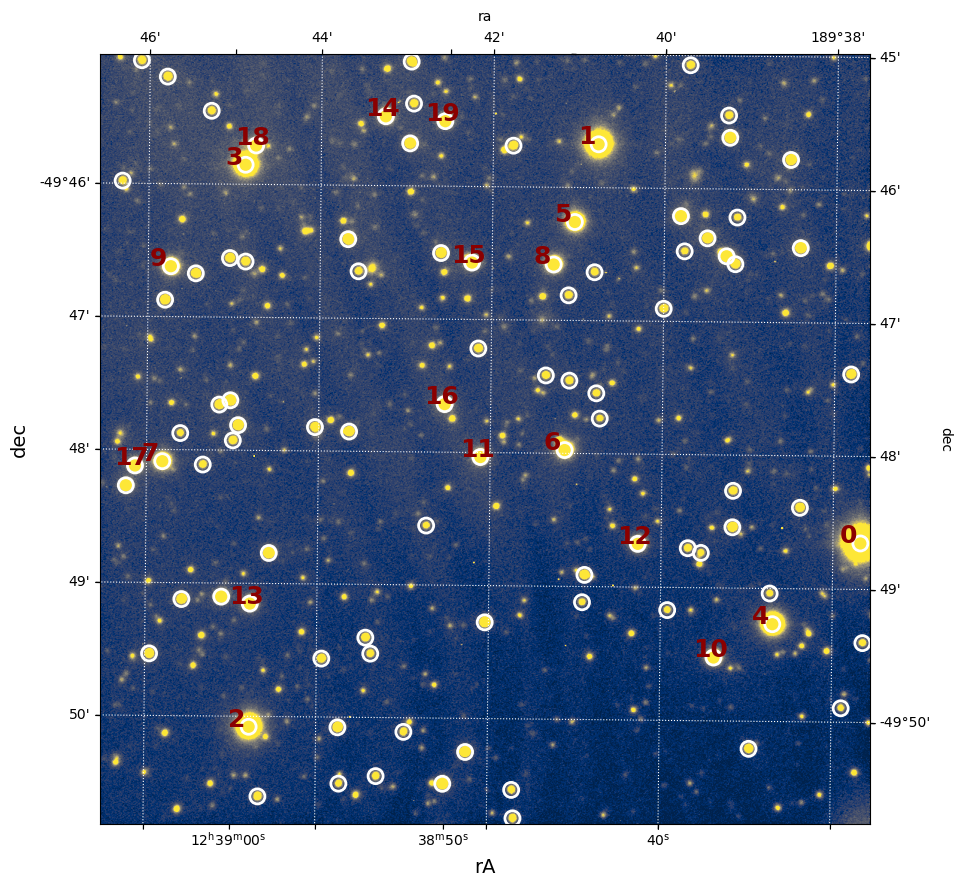

In [9]:
# run stack and reduce individual science images (produce *_proc.fits)
p = s4pipelib.stack_and_reduce_sci_images(p,
                                          sci_list,
                                          reducedir,
                                          stack_suffix=stack_suffix,
                                          force=FORCE,
                                          plot=True) 

### PLOT results

The function ``s4plt.plot_sci_frame`` can be used to plot ``proc.fits`` or ``stack.fits`` products, as in the example below.  

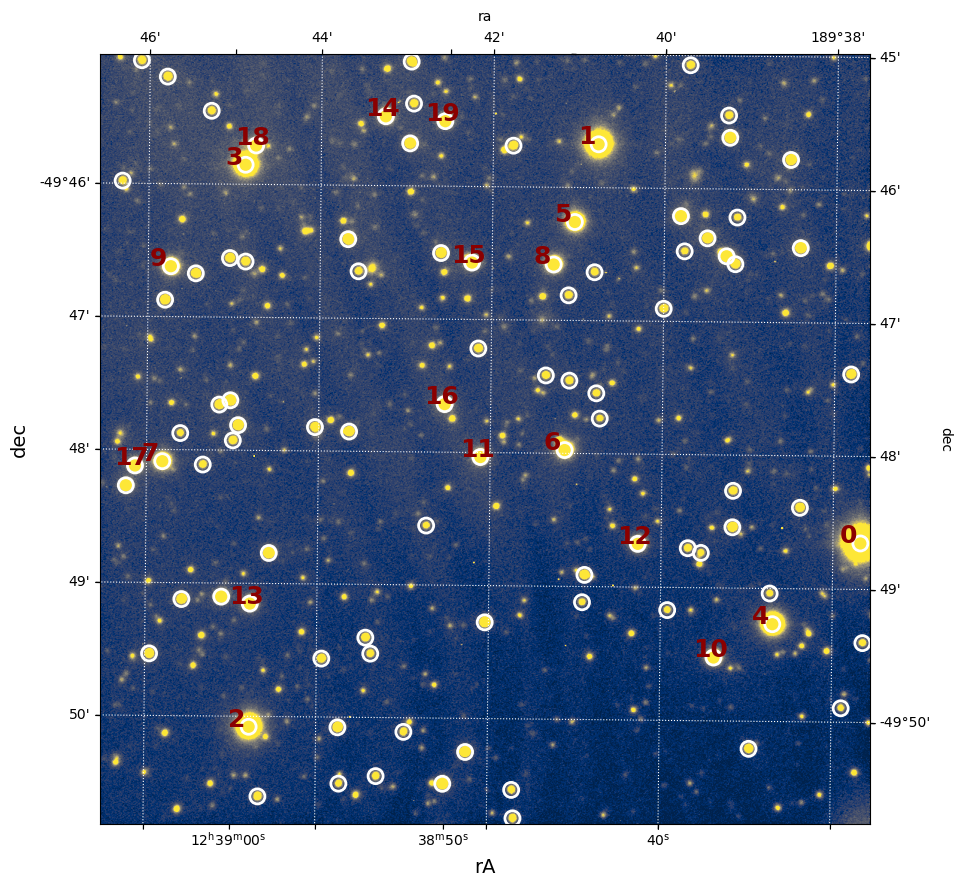

In [10]:
s4plt.plot_sci_frame(p['OBJECT_STACK'], cat_ext=3, nstars=20, use_sky_coords=True)

## Time series of `PHOTOMETRY` data : `light curve`

In this section, we compile all photometric information from the reduced ``proc.fits`` frames into a photometric time series product (`light curve`) using the routine ``s4pipelib.phot_time_series``. For this example, since there are only a few frames, the time series is not particularly interesting, as it contains only a few points in the time series.

In [11]:
ts_suffix = "{}_s4c{}_{}".format(NIGHTDIR, CHANNEL, OBJECTID.replace(" ",""))

list_of_catalogs = s4pipelib.get_list_of_catalogs(p['PHOT_APERTURES_FOR_LIGHTCURVES'])

phot_ts_product = s4pipelib.phot_time_series(p['OBJECT_REDUCED_IMAGES'][1:],
                                             ts_suffix=ts_suffix,
                                             reduce_dir=reducedir,
                                             time_key=p['TIME_KEYWORD_IN_PROC'],
                                             time_format=p['TIME_FORMAT_IN_PROC'],
                                             catalog_names=list_of_catalogs,
                                             time_span_for_rms=p['TIME_SPAN_FOR_RMS'],
                                             force=FORCE)

2024-04-24 20:44:23,692 root - INFO - Packing time series data for catalog: CATALOG_PHOT_AP006  [pipeline_lib]


2024-04-24 20:44:23,692 | INFO | Packing time series data for catalog: CATALOG_PHOT_AP006


2024-04-24 20:44:23,743 root - INFO - Packing time series data for catalog: CATALOG_PHOT_AP008  [pipeline_lib]


2024-04-24 20:44:23,743 | INFO | Packing time series data for catalog: CATALOG_PHOT_AP008


2024-04-24 20:44:23,787 root - INFO - Packing time series data for catalog: CATALOG_PHOT_AP010  [pipeline_lib]


2024-04-24 20:44:23,787 | INFO | Packing time series data for catalog: CATALOG_PHOT_AP010


2024-04-24 20:44:23,834 root - INFO - Packing time series data for catalog: CATALOG_PHOT_AP012  [pipeline_lib]


2024-04-24 20:44:23,834 | INFO | Packing time series data for catalog: CATALOG_PHOT_AP012


2024-04-24 20:44:23,881 root - INFO - Packing time series data for catalog: CATALOG_PHOT_AP014  [pipeline_lib]


2024-04-24 20:44:23,881 | INFO | Packing time series data for catalog: CATALOG_PHOT_AP014


2024-04-24 20:44:23,933 root - INFO - Packing time series data for catalog: CATALOG_PHOT_AP016  [pipeline_lib]


2024-04-24 20:44:23,933 | INFO | Packing time series data for catalog: CATALOG_PHOT_AP016


The function ``s4plt.plot_light_curve`` enables access to the photometric time series product and facilitates the construction of differential photometric light curves. The results are plotted and returned as an Astropy Table, which can also be saved to an output CSV file.

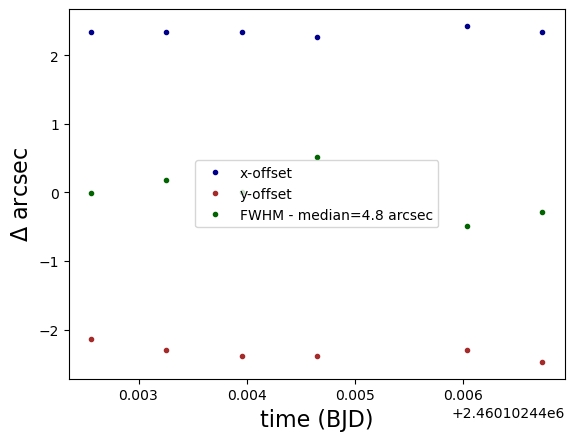

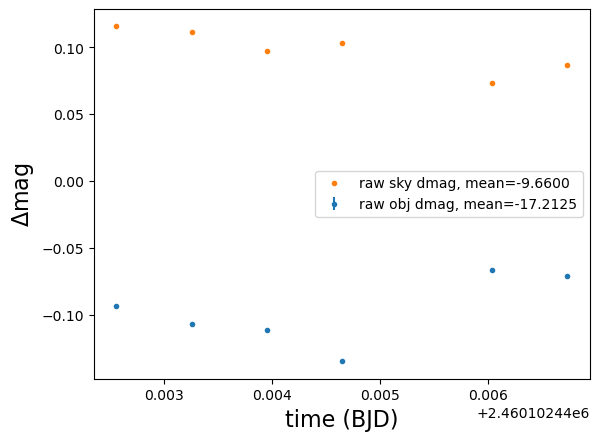

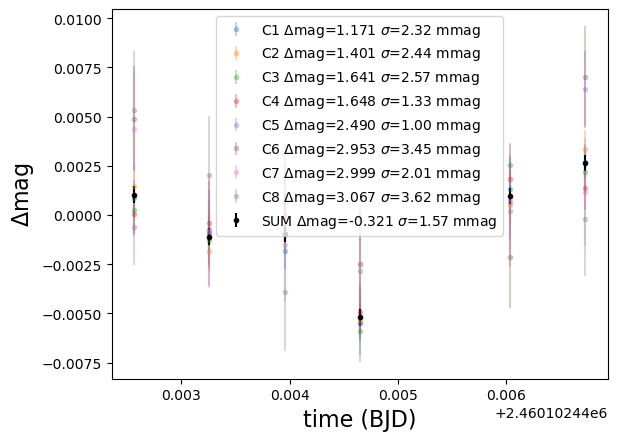

<Table length=6>
       TIME               x                  y                 fwhm        ...        magsum            magsum_err            diffmagsum      
     float64           float64            float64            float64       ...       float64             float64               float64        
----------------- ------------------ ------------------ ------------------ ... ------------------- -------------------- ----------------------
2460102.446036196 1011.5583993592952 373.41020514489236 12.781983618158671 ... -17.565992309893947 0.005362218014684386  0.0009580113038314408
2460102.446730652 1011.3083993592952 372.91020514489236  13.42269667789959 ... -17.559929497823088 0.005408245022828029   0.002643872874221742
2460102.444647272 1011.0583993592952 373.16020514489236 15.816887518148054 ...  -17.50391051324635 0.005711560210430767    -0.0051995238701803
2460102.442563881 1011.3083993592952 373.91020514489236 14.242925873417496 ... -17.539447852781226 0.005567577991411061  0.0010257892547809178
2460102.443258349 1011.3083993592952 373.41020514489236 14.795444014488115 ... -17.527938579261296 0.005600961311996393 -0.0010970142895398993
2460102.443952805 1011.3083993592952 373.16020514489236 14.268036259536146 ... -17.522863837575915 0.005609772454148034 -0.0009580113038314408

In [12]:
# Select target index
target = 0
# Select comparisons 
comps = [1, 2, 3, 4, 5, 6, 7, 8]

# plot light curve
s4plt.plot_light_curve(phot_ts_product,
                            target=target,
                            comps=comps,
                            nsig=10,
                            plot_coords=True,
                            plot_rawmags=True,
                            plot_sum=True,
                            plot_comps=True,
                            catalog_name=p['PHOT_REF_CATALOG_NAME'])

***
## `POLARIMETRIC` mode

## Select HD111579 data

In [13]:
# set an object ID matching the ID in the image header keyword 'OBJECT'
OBJECTID = "hd111579" # HD111579 is a polarimetric standard

# create a list of science data 
pol_list = glob.glob("{}/{}".format(datadir,"*stdpol.fits"))

# set instrument mode to "POLAR"
inst_mode = p['INSTMODE_POLARIMETRY_KEYVALUE']

FORCE = False

## Reduce scientific exposures in `POLARIMETRY HALF-WAVE (L/2)` mode

To reduce scientific frames in polarimetric mode, we also use the same routine, ``s4pipelib.stack_and_reduce_sci_images``. This routine performs similar procedures as in photometric mode. Additionally, it matches and organizes the polarimetric pairs (dual beam) into two distinct catalogs. Aperture photometry is computed for several aperture sizes across all sources and for all input image frames. Finally, the resulting calibrated images and their associated photometric catalogs are saved into 'proc.fits' product FITS files.

In [14]:
# initial set up
polar_mode = p['POLARIMETRY_L2_KEYVALUE']
polsuffix = "_{}_{}".format(inst_mode,polar_mode)

# set suffix for output stack filename
l2_stack_suffix = "{}_s4c{}_{}{}".format(NIGHTDIR, 
                                        CHANNEL, 
                                        OBJECTID.replace(" ",""), 
                                        polsuffix)

# make a list of half-wave files (L2)
pol_l2_list = s4utils.select_fits_files_with_keyword(pol_list, 'WPSEL', 'L2')

2024-04-24 20:44:24,465 root - INFO - Reference image: /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000029_stdpol.fits  [pipeline_lib]


2024-04-24 20:44:24,465 | INFO | Reference image: /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000029_stdpol.fits


2024-04-24 20:44:24,493 root - INFO - OBJECT files: 10  [pipeline_lib]


2024-04-24 20:44:24,493 | INFO | OBJECT files: 10


2024-04-24 20:44:24,494 root - INFO - Loading science frames to memory ...   [pipeline_lib]


2024-04-24 20:44:24,494 | INFO | Loading science frames to memory ... 


2024-04-24 20:44:24,647 root - INFO - gain:3.36 electron / adu  [pipeline_lib]


2024-04-24 20:44:24,647 | INFO | gain:3.36 electron / adu


2024-04-24 20:44:24,647 root - INFO - Calibrating science frames (CR, gain, bias, flat) ...   [pipeline_lib]


2024-04-24 20:44:24,647 | INFO | Calibrating science frames (CR, gain, bias, flat) ... 


2024-04-24 20:44:24,648 root - INFO - Calibrating science frame 1 of 10 : 20230606_s4c4_000029_stdpol.fits   [pipeline_lib]


2024-04-24 20:44:24,648 | INFO | Calibrating science frame 1 of 10 : 20230606_s4c4_000029_stdpol.fits 


2024-04-24 20:44:25,035 root - INFO - Calibrating science frame 2 of 10 : 20230606_s4c4_000045_stdpol.fits   [pipeline_lib]


2024-04-24 20:44:25,035 | INFO | Calibrating science frame 2 of 10 : 20230606_s4c4_000045_stdpol.fits 


2024-04-24 20:44:25,414 root - INFO - Calibrating science frame 3 of 10 : 20230606_s4c4_000035_stdpol.fits   [pipeline_lib]


2024-04-24 20:44:25,414 | INFO | Calibrating science frame 3 of 10 : 20230606_s4c4_000035_stdpol.fits 


2024-04-24 20:44:25,786 root - INFO - Calibrating science frame 4 of 10 : 20230606_s4c4_000025_stdpol.fits   [pipeline_lib]


2024-04-24 20:44:25,786 | INFO | Calibrating science frame 4 of 10 : 20230606_s4c4_000025_stdpol.fits 


2024-04-24 20:44:26,162 root - INFO - Calibrating science frame 5 of 10 : 20230606_s4c4_000049_stdpol.fits   [pipeline_lib]


2024-04-24 20:44:26,162 | INFO | Calibrating science frame 5 of 10 : 20230606_s4c4_000049_stdpol.fits 


2024-04-24 20:44:26,536 root - INFO - Calibrating science frame 6 of 10 : 20230606_s4c4_000039_stdpol.fits   [pipeline_lib]


2024-04-24 20:44:26,536 | INFO | Calibrating science frame 6 of 10 : 20230606_s4c4_000039_stdpol.fits 


2024-04-24 20:44:26,907 root - INFO - Calibrating science frame 7 of 10 : 20230606_s4c4_000033_stdpol.fits   [pipeline_lib]


2024-04-24 20:44:26,907 | INFO | Calibrating science frame 7 of 10 : 20230606_s4c4_000033_stdpol.fits 


2024-04-24 20:44:27,279 root - INFO - Calibrating science frame 8 of 10 : 20230606_s4c4_000043_stdpol.fits   [pipeline_lib]


2024-04-24 20:44:27,279 | INFO | Calibrating science frame 8 of 10 : 20230606_s4c4_000043_stdpol.fits 


2024-04-24 20:44:27,660 root - INFO - Calibrating science frame 9 of 10 : 20230606_s4c4_000023_stdpol.fits   [pipeline_lib]


2024-04-24 20:44:27,660 | INFO | Calibrating science frame 9 of 10 : 20230606_s4c4_000023_stdpol.fits 


2024-04-24 20:44:28,047 root - INFO - Calibrating science frame 10 of 10 : 20230606_s4c4_000041_stdpol.fits   [pipeline_lib]


2024-04-24 20:44:28,047 | INFO | Calibrating science frame 10 of 10 : 20230606_s4c4_000041_stdpol.fits 


2024-04-24 20:44:28,443 root - INFO - Registering science frames and stacking them ...   [pipeline_lib]


2024-04-24 20:44:28,443 | INFO | Registering science frames and stacking them ... 


2024-04-24 20:44:28,445 root - INFO - Selected file for stack:0 /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000029_stdpol.fits  [pipeline_lib]


2024-04-24 20:44:28,445 | INFO | Selected file for stack:0 /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000029_stdpol.fits


2024-04-24 20:44:28,447 root - INFO - Selected file for stack:1 /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000045_stdpol.fits  [pipeline_lib]


2024-04-24 20:44:28,447 | INFO | Selected file for stack:1 /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000045_stdpol.fits


2024-04-24 20:44:28,448 root - INFO - Selected file for stack:2 /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000035_stdpol.fits  [pipeline_lib]


2024-04-24 20:44:28,448 | INFO | Selected file for stack:2 /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000035_stdpol.fits


2024-04-24 20:44:28,450 root - INFO - Selected file for stack:3 /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000025_stdpol.fits  [pipeline_lib]


2024-04-24 20:44:28,450 | INFO | Selected file for stack:3 /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000025_stdpol.fits


2024-04-24 20:44:28,452 root - INFO - Selected file for stack:4 /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000049_stdpol.fits  [pipeline_lib]


2024-04-24 20:44:28,452 | INFO | Selected file for stack:4 /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000049_stdpol.fits


2024-04-24 20:44:28,453 root - INFO - Selected file for stack:5 /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000039_stdpol.fits  [pipeline_lib]


2024-04-24 20:44:28,453 | INFO | Selected file for stack:5 /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000039_stdpol.fits


2024-04-24 20:44:28,455 root - INFO - Selected file for stack:6 /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000033_stdpol.fits  [pipeline_lib]


2024-04-24 20:44:28,455 | INFO | Selected file for stack:6 /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000033_stdpol.fits


2024-04-24 20:44:28,457 root - INFO - Selected file for stack:7 /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000043_stdpol.fits  [pipeline_lib]


2024-04-24 20:44:28,457 | INFO | Selected file for stack:7 /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000043_stdpol.fits


2024-04-24 20:44:28,459 root - INFO - Selected file for stack:8 /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000023_stdpol.fits  [pipeline_lib]


2024-04-24 20:44:28,459 | INFO | Selected file for stack:8 /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000023_stdpol.fits


2024-04-24 20:44:28,460 root - INFO - Selected file for stack:9 /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000041_stdpol.fits  [pipeline_lib]


2024-04-24 20:44:28,460 | INFO | Selected file for stack:9 /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000041_stdpol.fits


2024-04-24 20:44:28,462 astropop - INFO - Registering image 1 from 10  [register]


2024-04-24 20:44:28,462 | INFO | Registering image 1 from 10


2024-04-24 20:44:28,465 astropop - INFO - Images are equal, skipping registering.  [register]


2024-04-24 20:44:28,465 | INFO | Images are equal, skipping registering.


2024-04-24 20:44:28,617 astropop - INFO - Registering image 2 from 10  [register]


2024-04-24 20:44:28,617 | INFO | Registering image 2 from 10


2024-04-24 20:44:28,760 astropop - INFO - Filling registered image with cval=37.57  [register]


2024-04-24 20:44:28,760 | INFO | Filling registered image with cval=37.57


2024-04-24 20:44:28,768 astropop - INFO - Registering image with: translation=[ 1.5  -1.75], rotation=0.00°  [register]


2024-04-24 20:44:28,768 | INFO | Registering image with: translation=[ 1.5  -1.75], rotation=0.00°


2024-04-24 20:44:28,979 astropop - INFO - Registering image 3 from 10  [register]


2024-04-24 20:44:28,979 | INFO | Registering image 3 from 10


2024-04-24 20:44:29,116 astropop - INFO - Filling registered image with cval=36.14  [register]


2024-04-24 20:44:29,116 | INFO | Filling registered image with cval=36.14


2024-04-24 20:44:29,118 astropop - INFO - Registering image with: translation=[ 1.25 -0.5 ], rotation=0.00°  [register]


2024-04-24 20:44:29,118 | INFO | Registering image with: translation=[ 1.25 -0.5 ], rotation=0.00°


2024-04-24 20:44:29,413 astropop - INFO - Registering image 4 from 10  [register]


2024-04-24 20:44:29,413 | INFO | Registering image 4 from 10


2024-04-24 20:44:29,556 astropop - INFO - Filling registered image with cval=35.26  [register]


2024-04-24 20:44:29,556 | INFO | Filling registered image with cval=35.26


2024-04-24 20:44:29,558 astropop - INFO - Registering image with: translation=[ 1.25 -0.  ], rotation=0.00°  [register]


2024-04-24 20:44:29,558 | INFO | Registering image with: translation=[ 1.25 -0.  ], rotation=0.00°


2024-04-24 20:44:29,793 astropop - INFO - Registering image 5 from 10  [register]


2024-04-24 20:44:29,793 | INFO | Registering image 5 from 10


2024-04-24 20:44:29,920 astropop - INFO - Filling registered image with cval=31.54  [register]


2024-04-24 20:44:29,920 | INFO | Filling registered image with cval=31.54


2024-04-24 20:44:29,929 astropop - INFO - Registering image with: translation=[ 1.5  -0.75], rotation=0.00°  [register]


2024-04-24 20:44:29,929 | INFO | Registering image with: translation=[ 1.5  -0.75], rotation=0.00°


2024-04-24 20:44:30,145 astropop - INFO - Registering image 6 from 10  [register]


2024-04-24 20:44:30,145 | INFO | Registering image 6 from 10


2024-04-24 20:44:30,271 astropop - INFO - Filling registered image with cval=35.31  [register]


2024-04-24 20:44:30,271 | INFO | Filling registered image with cval=35.31


2024-04-24 20:44:30,276 astropop - INFO - Registering image with: translation=[-0.5 -3. ], rotation=0.00°  [register]


2024-04-24 20:44:30,276 | INFO | Registering image with: translation=[-0.5 -3. ], rotation=0.00°


2024-04-24 20:44:30,440 astropop - INFO - Registering image 7 from 10  [register]


2024-04-24 20:44:30,440 | INFO | Registering image 7 from 10


2024-04-24 20:44:30,600 astropop - INFO - Filling registered image with cval=36.16  [register]


2024-04-24 20:44:30,600 | INFO | Filling registered image with cval=36.16


2024-04-24 20:44:30,607 astropop - INFO - Registering image with: translation=[-0.75 -0.75], rotation=0.00°  [register]


2024-04-24 20:44:30,607 | INFO | Registering image with: translation=[-0.75 -0.75], rotation=0.00°


2024-04-24 20:44:30,838 astropop - INFO - Registering image 8 from 10  [register]


2024-04-24 20:44:30,838 | INFO | Registering image 8 from 10


2024-04-24 20:44:30,984 astropop - INFO - Filling registered image with cval=37.31  [register]


2024-04-24 20:44:30,984 | INFO | Filling registered image with cval=37.31


2024-04-24 20:44:30,987 astropop - INFO - Registering image with: translation=[-0.   -1.75], rotation=0.00°  [register]


2024-04-24 20:44:30,987 | INFO | Registering image with: translation=[-0.   -1.75], rotation=0.00°


2024-04-24 20:44:31,171 astropop - INFO - Registering image 9 from 10  [register]


2024-04-24 20:44:31,171 | INFO | Registering image 9 from 10


2024-04-24 20:44:31,282 astropop - INFO - Filling registered image with cval=35.31  [register]


2024-04-24 20:44:31,282 | INFO | Filling registered image with cval=35.31


2024-04-24 20:44:31,293 astropop - INFO - Registering image with: translation=[1.   0.25], rotation=0.00°  [register]


2024-04-24 20:44:31,293 | INFO | Registering image with: translation=[1.   0.25], rotation=0.00°


2024-04-24 20:44:31,446 astropop - INFO - Registering image 10 from 10  [register]


2024-04-24 20:44:31,446 | INFO | Registering image 10 from 10


2024-04-24 20:44:31,569 astropop - INFO - Filling registered image with cval=34.45  [register]


2024-04-24 20:44:31,569 | INFO | Filling registered image with cval=34.45


2024-04-24 20:44:31,577 astropop - INFO - Registering image with: translation=[ 2.25 -1.25], rotation=0.00°  [register]


2024-04-24 20:44:31,577 | INFO | Registering image with: translation=[ 2.25 -1.25], rotation=0.00°


2024-04-24 20:44:31,773 astropop - INFO - Combining 10 images with mean method.  [imcombine]


2024-04-24 20:44:31,773 | INFO | Combining 10 images with mean method.


2024-04-24 20:44:33,092 root - INFO - Creating new catalog of detected sources:  [pipeline_lib]


2024-04-24 20:44:33,092 | INFO | Creating new catalog of detected sources:


2024-04-24 20:44:33,268 root - INFO - Solving astrometry in POLAR-MODE using astrometry_from_existing_wcs()  [pipeline_lib]


2024-04-24 20:44:33,268 | INFO | Solving astrometry in POLAR-MODE using astrometry_from_existing_wcs()


2024-04-24 20:44:33,268 root - INFO - No sky coordinates given, searching sources in online catalogs  [pipeline_lib]


2024-04-24 20:44:33,268 | INFO | No sky coordinates given, searching sources in online catalogs


2024-04-24 20:44:33,269 root - INFO - Querying Gaia DR3 using twirl  [pipeline_lib]


2024-04-24 20:44:33,269 | INFO | Querying Gaia DR3 using twirl


2024-04-24 20:44:35,425 root - INFO - Matching sources with catalog and solving astrometry to compute WCS  [pipeline_lib]


2024-04-24 20:44:35,425 | INFO | Matching sources with catalog and solving astrometry to compute WCS


2024-04-24 20:44:35,915 root - INFO - Running photometry for multiple apertures:  [pipeline_lib]


2024-04-24 20:44:35,915 | INFO | Running photometry for multiple apertures:


2024-04-24 20:44:35,915 root - INFO - Aperture radius of 6 pixels: 1 of 6 :  [pipeline_lib]


2024-04-24 20:44:35,915 | INFO | Aperture radius of 6 pixels: 1 of 6 :


2024-04-24 20:44:36,082 root - INFO - Aperture radius of 8 pixels: 2 of 6 :  [pipeline_lib]


2024-04-24 20:44:36,082 | INFO | Aperture radius of 8 pixels: 2 of 6 :


2024-04-24 20:44:36,245 root - INFO - Aperture radius of 10 pixels: 3 of 6 :  [pipeline_lib]


2024-04-24 20:44:36,245 | INFO | Aperture radius of 10 pixels: 3 of 6 :


2024-04-24 20:44:36,408 root - INFO - Aperture radius of 12 pixels: 4 of 6 :  [pipeline_lib]


2024-04-24 20:44:36,408 | INFO | Aperture radius of 12 pixels: 4 of 6 :


2024-04-24 20:44:36,571 root - INFO - Aperture radius of 14 pixels: 5 of 6 :  [pipeline_lib]


2024-04-24 20:44:36,571 | INFO | Aperture radius of 14 pixels: 5 of 6 :


2024-04-24 20:44:36,735 root - INFO - Aperture radius of 16 pixels: 6 of 6 :  [pipeline_lib]


2024-04-24 20:44:36,735 | INFO | Aperture radius of 16 pixels: 6 of 6 :


2024-04-24 20:44:37,032 root - INFO - The 16 images will be reduced in 1 loops of 100 images each time  [pipeline_lib]


2024-04-24 20:44:37,032 | INFO | The 16 images will be reduced in 1 loops of 100 images each time


2024-04-24 20:44:37,033 root - INFO - Running loop 0 of 1 -> images in loop: 0 to 16 ...   [pipeline_lib]


2024-04-24 20:44:37,033 | INFO | Running loop 0 of 1 -> images in loop: 0 to 16 ... 


2024-04-24 20:44:37,138 root - INFO - OBJECT files: 16  [pipeline_lib]


2024-04-24 20:44:37,138 | INFO | OBJECT files: 16


2024-04-24 20:44:37,139 root - INFO - Creating output list of processed science frames ...   [pipeline_lib]


2024-04-24 20:44:37,139 | INFO | Creating output list of processed science frames ... 


2024-04-24 20:44:37,140 root - INFO - 1 of 16 is reduced? False -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000029_stdpol_proc.fits  [pipeline_lib]


2024-04-24 20:44:37,140 | INFO | 1 of 16 is reduced? False -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000029_stdpol_proc.fits


2024-04-24 20:44:37,140 root - INFO - 2 of 16 is reduced? False -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000045_stdpol_proc.fits  [pipeline_lib]


2024-04-24 20:44:37,140 | INFO | 2 of 16 is reduced? False -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000045_stdpol_proc.fits


2024-04-24 20:44:37,141 root - INFO - 3 of 16 is reduced? False -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000035_stdpol_proc.fits  [pipeline_lib]


2024-04-24 20:44:37,141 | INFO | 3 of 16 is reduced? False -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000035_stdpol_proc.fits


2024-04-24 20:44:37,142 root - INFO - 4 of 16 is reduced? False -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000025_stdpol_proc.fits  [pipeline_lib]


2024-04-24 20:44:37,142 | INFO | 4 of 16 is reduced? False -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000025_stdpol_proc.fits


2024-04-24 20:44:37,143 root - INFO - 5 of 16 is reduced? False -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000049_stdpol_proc.fits  [pipeline_lib]


2024-04-24 20:44:37,143 | INFO | 5 of 16 is reduced? False -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000049_stdpol_proc.fits


2024-04-24 20:44:37,143 root - INFO - 6 of 16 is reduced? False -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000039_stdpol_proc.fits  [pipeline_lib]


2024-04-24 20:44:37,143 | INFO | 6 of 16 is reduced? False -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000039_stdpol_proc.fits


2024-04-24 20:44:37,144 root - INFO - 7 of 16 is reduced? False -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000033_stdpol_proc.fits  [pipeline_lib]


2024-04-24 20:44:37,144 | INFO | 7 of 16 is reduced? False -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000033_stdpol_proc.fits


2024-04-24 20:44:37,144 root - INFO - 8 of 16 is reduced? False -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000043_stdpol_proc.fits  [pipeline_lib]


2024-04-24 20:44:37,144 | INFO | 8 of 16 is reduced? False -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000043_stdpol_proc.fits


2024-04-24 20:44:37,145 root - INFO - 9 of 16 is reduced? False -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000023_stdpol_proc.fits  [pipeline_lib]


2024-04-24 20:44:37,145 | INFO | 9 of 16 is reduced? False -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000023_stdpol_proc.fits


2024-04-24 20:44:37,146 root - INFO - 10 of 16 is reduced? False -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000041_stdpol_proc.fits  [pipeline_lib]


2024-04-24 20:44:37,146 | INFO | 10 of 16 is reduced? False -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000041_stdpol_proc.fits


2024-04-24 20:44:37,146 root - INFO - 11 of 16 is reduced? False -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000031_stdpol_proc.fits  [pipeline_lib]


2024-04-24 20:44:37,146 | INFO | 11 of 16 is reduced? False -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000031_stdpol_proc.fits


2024-04-24 20:44:37,147 root - INFO - 12 of 16 is reduced? False -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000021_stdpol_proc.fits  [pipeline_lib]


2024-04-24 20:44:37,147 | INFO | 12 of 16 is reduced? False -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000021_stdpol_proc.fits


2024-04-24 20:44:37,148 root - INFO - 13 of 16 is reduced? False -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000037_stdpol_proc.fits  [pipeline_lib]


2024-04-24 20:44:37,148 | INFO | 13 of 16 is reduced? False -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000037_stdpol_proc.fits


2024-04-24 20:44:37,148 root - INFO - 14 of 16 is reduced? False -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000047_stdpol_proc.fits  [pipeline_lib]


2024-04-24 20:44:37,148 | INFO | 14 of 16 is reduced? False -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000047_stdpol_proc.fits


2024-04-24 20:44:37,149 root - INFO - 15 of 16 is reduced? False -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000019_stdpol_proc.fits  [pipeline_lib]


2024-04-24 20:44:37,149 | INFO | 15 of 16 is reduced? False -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000019_stdpol_proc.fits


2024-04-24 20:44:37,150 root - INFO - 16 of 16 is reduced? False -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000027_stdpol_proc.fits  [pipeline_lib]


2024-04-24 20:44:37,150 | INFO | 16 of 16 is reduced? False -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000027_stdpol_proc.fits


2024-04-24 20:44:37,150 root - INFO - Loading science frames to memory ...   [pipeline_lib]


2024-04-24 20:44:37,150 | INFO | Loading science frames to memory ... 


2024-04-24 20:44:37,376 root - INFO - gain:3.36 electron / adu  [pipeline_lib]


2024-04-24 20:44:37,376 | INFO | gain:3.36 electron / adu


2024-04-24 20:44:37,377 root - INFO - Calibrating science frames (CR, gain, bias, flat) ...   [pipeline_lib]


2024-04-24 20:44:37,377 | INFO | Calibrating science frames (CR, gain, bias, flat) ... 


2024-04-24 20:44:37,378 root - INFO - Calibrating science frame 1 of 16 : 20230606_s4c4_000029_stdpol.fits   [pipeline_lib]


2024-04-24 20:44:37,378 | INFO | Calibrating science frame 1 of 16 : 20230606_s4c4_000029_stdpol.fits 


2024-04-24 20:44:37,753 root - INFO - Calibrating science frame 2 of 16 : 20230606_s4c4_000045_stdpol.fits   [pipeline_lib]


2024-04-24 20:44:37,753 | INFO | Calibrating science frame 2 of 16 : 20230606_s4c4_000045_stdpol.fits 


2024-04-24 20:44:38,115 root - INFO - Calibrating science frame 3 of 16 : 20230606_s4c4_000035_stdpol.fits   [pipeline_lib]


2024-04-24 20:44:38,115 | INFO | Calibrating science frame 3 of 16 : 20230606_s4c4_000035_stdpol.fits 


2024-04-24 20:44:38,487 root - INFO - Calibrating science frame 4 of 16 : 20230606_s4c4_000025_stdpol.fits   [pipeline_lib]


2024-04-24 20:44:38,487 | INFO | Calibrating science frame 4 of 16 : 20230606_s4c4_000025_stdpol.fits 


2024-04-24 20:44:38,852 root - INFO - Calibrating science frame 5 of 16 : 20230606_s4c4_000049_stdpol.fits   [pipeline_lib]


2024-04-24 20:44:38,852 | INFO | Calibrating science frame 5 of 16 : 20230606_s4c4_000049_stdpol.fits 


2024-04-24 20:44:39,216 root - INFO - Calibrating science frame 6 of 16 : 20230606_s4c4_000039_stdpol.fits   [pipeline_lib]


2024-04-24 20:44:39,216 | INFO | Calibrating science frame 6 of 16 : 20230606_s4c4_000039_stdpol.fits 


2024-04-24 20:44:39,583 root - INFO - Calibrating science frame 7 of 16 : 20230606_s4c4_000033_stdpol.fits   [pipeline_lib]


2024-04-24 20:44:39,583 | INFO | Calibrating science frame 7 of 16 : 20230606_s4c4_000033_stdpol.fits 


2024-04-24 20:44:39,946 root - INFO - Calibrating science frame 8 of 16 : 20230606_s4c4_000043_stdpol.fits   [pipeline_lib]


2024-04-24 20:44:39,946 | INFO | Calibrating science frame 8 of 16 : 20230606_s4c4_000043_stdpol.fits 


2024-04-24 20:44:40,316 root - INFO - Calibrating science frame 9 of 16 : 20230606_s4c4_000023_stdpol.fits   [pipeline_lib]


2024-04-24 20:44:40,316 | INFO | Calibrating science frame 9 of 16 : 20230606_s4c4_000023_stdpol.fits 


2024-04-24 20:44:40,685 root - INFO - Calibrating science frame 10 of 16 : 20230606_s4c4_000041_stdpol.fits   [pipeline_lib]


2024-04-24 20:44:40,685 | INFO | Calibrating science frame 10 of 16 : 20230606_s4c4_000041_stdpol.fits 


2024-04-24 20:44:41,048 root - INFO - Calibrating science frame 11 of 16 : 20230606_s4c4_000031_stdpol.fits   [pipeline_lib]


2024-04-24 20:44:41,048 | INFO | Calibrating science frame 11 of 16 : 20230606_s4c4_000031_stdpol.fits 


2024-04-24 20:44:41,405 root - INFO - Calibrating science frame 12 of 16 : 20230606_s4c4_000021_stdpol.fits   [pipeline_lib]


2024-04-24 20:44:41,405 | INFO | Calibrating science frame 12 of 16 : 20230606_s4c4_000021_stdpol.fits 


2024-04-24 20:44:41,754 root - INFO - Calibrating science frame 13 of 16 : 20230606_s4c4_000037_stdpol.fits   [pipeline_lib]


2024-04-24 20:44:41,754 | INFO | Calibrating science frame 13 of 16 : 20230606_s4c4_000037_stdpol.fits 


2024-04-24 20:44:42,126 root - INFO - Calibrating science frame 14 of 16 : 20230606_s4c4_000047_stdpol.fits   [pipeline_lib]


2024-04-24 20:44:42,126 | INFO | Calibrating science frame 14 of 16 : 20230606_s4c4_000047_stdpol.fits 


2024-04-24 20:44:42,479 root - INFO - Calibrating science frame 15 of 16 : 20230606_s4c4_000019_stdpol.fits   [pipeline_lib]


2024-04-24 20:44:42,479 | INFO | Calibrating science frame 15 of 16 : 20230606_s4c4_000019_stdpol.fits 


2024-04-24 20:44:42,848 root - INFO - Calibrating science frame 16 of 16 : 20230606_s4c4_000027_stdpol.fits   [pipeline_lib]


2024-04-24 20:44:42,848 | INFO | Calibrating science frame 16 of 16 : 20230606_s4c4_000027_stdpol.fits 


2024-04-24 20:44:43,204 root - INFO - Calculating offsets ...   [pipeline_lib]


2024-04-24 20:44:43,204 | INFO | Calculating offsets ... 


2024-04-24 20:44:43,205 root - INFO - Computing offsets with respect to the reference image: index=0 -> /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000029_stdpol.fits  [pipeline_lib]


2024-04-24 20:44:43,205 | INFO | Computing offsets with respect to the reference image: index=0 -> /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000029_stdpol.fits


2024-04-24 20:44:43,207 astropop - INFO - Computing shift of image 1 from 16  [register]


2024-04-24 20:44:43,207 | INFO | Computing shift of image 1 from 16


2024-04-24 20:44:43,207 astropop - INFO - Computing shift of image 2 from 16  [register]


2024-04-24 20:44:43,207 | INFO | Computing shift of image 2 from 16


2024-04-24 20:44:43,254 astropop - INFO - Computing shift of image 3 from 16  [register]


2024-04-24 20:44:43,254 | INFO | Computing shift of image 3 from 16


2024-04-24 20:44:43,316 astropop - INFO - Computing shift of image 4 from 16  [register]


2024-04-24 20:44:43,316 | INFO | Computing shift of image 4 from 16


2024-04-24 20:44:43,389 astropop - INFO - Computing shift of image 5 from 16  [register]


2024-04-24 20:44:43,389 | INFO | Computing shift of image 5 from 16


2024-04-24 20:44:43,483 astropop - INFO - Computing shift of image 6 from 16  [register]


2024-04-24 20:44:43,483 | INFO | Computing shift of image 6 from 16


2024-04-24 20:44:43,545 astropop - INFO - Computing shift of image 7 from 16  [register]


2024-04-24 20:44:43,545 | INFO | Computing shift of image 7 from 16


2024-04-24 20:44:43,603 astropop - INFO - Computing shift of image 8 from 16  [register]


2024-04-24 20:44:43,603 | INFO | Computing shift of image 8 from 16


2024-04-24 20:44:43,664 astropop - INFO - Computing shift of image 9 from 16  [register]


2024-04-24 20:44:43,664 | INFO | Computing shift of image 9 from 16


2024-04-24 20:44:43,715 astropop - INFO - Computing shift of image 10 from 16  [register]


2024-04-24 20:44:43,715 | INFO | Computing shift of image 10 from 16


2024-04-24 20:44:43,775 astropop - INFO - Computing shift of image 11 from 16  [register]


2024-04-24 20:44:43,775 | INFO | Computing shift of image 11 from 16


2024-04-24 20:44:43,837 astropop - INFO - Computing shift of image 12 from 16  [register]


2024-04-24 20:44:43,837 | INFO | Computing shift of image 12 from 16


2024-04-24 20:44:43,904 astropop - INFO - Computing shift of image 13 from 16  [register]


2024-04-24 20:44:43,904 | INFO | Computing shift of image 13 from 16


2024-04-24 20:44:43,973 astropop - INFO - Computing shift of image 14 from 16  [register]


2024-04-24 20:44:43,973 | INFO | Computing shift of image 14 from 16


2024-04-24 20:44:44,041 astropop - INFO - Computing shift of image 15 from 16  [register]


2024-04-24 20:44:44,041 | INFO | Computing shift of image 15 from 16


2024-04-24 20:44:44,104 astropop - INFO - Computing shift of image 16 from 16  [register]


2024-04-24 20:44:44,104 | INFO | Computing shift of image 16 from 16


2024-04-24 20:44:44,214 root - INFO - Processing file: 20230606_s4c4_000029_stdpol.fits  [pipeline_lib]


2024-04-24 20:44:44,214 | INFO | Processing file: 20230606_s4c4_000029_stdpol.fits


2024-04-24 20:44:44,220 root - INFO - Exposure time: 3.00 s; Readout noise: 6.55 e-  [pipeline_lib]


2024-04-24 20:44:44,220 | INFO | Exposure time: 3.00 s; Readout noise: 6.55 e-


2024-04-24 20:44:44,251 root - INFO - Running aperture photometry for catalogs with an offset of dx=0.0 dy=0.0  [pipeline_lib]


2024-04-24 20:44:44,251 | INFO | Running aperture photometry for catalogs with an offset of dx=0.0 dy=0.0


2024-04-24 20:44:45,359 root - INFO - Saving frame 1 of 16: /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000029_stdpol.fits -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000029_stdpol_proc.fits  [pipeline_lib]


2024-04-24 20:44:45,359 | INFO | Saving frame 1 of 16: /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000029_stdpol.fits -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000029_stdpol_proc.fits


2024-04-24 20:44:45,446 root - INFO - Processing file: 20230606_s4c4_000045_stdpol.fits  [pipeline_lib]


2024-04-24 20:44:45,446 | INFO | Processing file: 20230606_s4c4_000045_stdpol.fits


2024-04-24 20:44:45,447 root - INFO - Exposure time: 3.00 s; Readout noise: 6.55 e-  [pipeline_lib]


2024-04-24 20:44:45,447 | INFO | Exposure time: 3.00 s; Readout noise: 6.55 e-


2024-04-24 20:44:45,462 root - INFO - Running aperture photometry for catalogs with an offset of dx=1.5 dy=-1.75  [pipeline_lib]


2024-04-24 20:44:45,462 | INFO | Running aperture photometry for catalogs with an offset of dx=1.5 dy=-1.75


2024-04-24 20:44:46,460 root - INFO - Saving frame 2 of 16: /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000045_stdpol.fits -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000045_stdpol_proc.fits  [pipeline_lib]


2024-04-24 20:44:46,460 | INFO | Saving frame 2 of 16: /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000045_stdpol.fits -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000045_stdpol_proc.fits


2024-04-24 20:44:46,547 root - INFO - Processing file: 20230606_s4c4_000035_stdpol.fits  [pipeline_lib]


2024-04-24 20:44:46,547 | INFO | Processing file: 20230606_s4c4_000035_stdpol.fits


2024-04-24 20:44:46,549 root - INFO - Exposure time: 3.00 s; Readout noise: 6.55 e-  [pipeline_lib]


2024-04-24 20:44:46,549 | INFO | Exposure time: 3.00 s; Readout noise: 6.55 e-


2024-04-24 20:44:46,564 root - INFO - Running aperture photometry for catalogs with an offset of dx=1.25 dy=-0.5  [pipeline_lib]


2024-04-24 20:44:46,564 | INFO | Running aperture photometry for catalogs with an offset of dx=1.25 dy=-0.5


2024-04-24 20:44:47,574 root - INFO - Saving frame 3 of 16: /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000035_stdpol.fits -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000035_stdpol_proc.fits  [pipeline_lib]


2024-04-24 20:44:47,574 | INFO | Saving frame 3 of 16: /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000035_stdpol.fits -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000035_stdpol_proc.fits


2024-04-24 20:44:47,662 root - INFO - Processing file: 20230606_s4c4_000025_stdpol.fits  [pipeline_lib]


2024-04-24 20:44:47,662 | INFO | Processing file: 20230606_s4c4_000025_stdpol.fits


2024-04-24 20:44:47,663 root - INFO - Exposure time: 3.00 s; Readout noise: 6.55 e-  [pipeline_lib]


2024-04-24 20:44:47,663 | INFO | Exposure time: 3.00 s; Readout noise: 6.55 e-


2024-04-24 20:44:47,678 root - INFO - Running aperture photometry for catalogs with an offset of dx=1.25 dy=-0.0  [pipeline_lib]


2024-04-24 20:44:47,678 | INFO | Running aperture photometry for catalogs with an offset of dx=1.25 dy=-0.0


2024-04-24 20:44:48,665 root - INFO - Saving frame 4 of 16: /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000025_stdpol.fits -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000025_stdpol_proc.fits  [pipeline_lib]


2024-04-24 20:44:48,665 | INFO | Saving frame 4 of 16: /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000025_stdpol.fits -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000025_stdpol_proc.fits


2024-04-24 20:44:48,749 root - INFO - Processing file: 20230606_s4c4_000049_stdpol.fits  [pipeline_lib]


2024-04-24 20:44:48,749 | INFO | Processing file: 20230606_s4c4_000049_stdpol.fits


2024-04-24 20:44:48,751 root - INFO - Exposure time: 3.00 s; Readout noise: 6.55 e-  [pipeline_lib]


2024-04-24 20:44:48,751 | INFO | Exposure time: 3.00 s; Readout noise: 6.55 e-


2024-04-24 20:44:48,766 root - INFO - Running aperture photometry for catalogs with an offset of dx=1.5 dy=-0.75  [pipeline_lib]


2024-04-24 20:44:48,766 | INFO | Running aperture photometry for catalogs with an offset of dx=1.5 dy=-0.75


2024-04-24 20:44:49,809 root - INFO - Saving frame 5 of 16: /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000049_stdpol.fits -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000049_stdpol_proc.fits  [pipeline_lib]


2024-04-24 20:44:49,809 | INFO | Saving frame 5 of 16: /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000049_stdpol.fits -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000049_stdpol_proc.fits


2024-04-24 20:44:49,896 root - INFO - Processing file: 20230606_s4c4_000039_stdpol.fits  [pipeline_lib]


2024-04-24 20:44:49,896 | INFO | Processing file: 20230606_s4c4_000039_stdpol.fits


2024-04-24 20:44:49,898 root - INFO - Exposure time: 3.00 s; Readout noise: 6.55 e-  [pipeline_lib]


2024-04-24 20:44:49,898 | INFO | Exposure time: 3.00 s; Readout noise: 6.55 e-


2024-04-24 20:44:49,913 root - INFO - Running aperture photometry for catalogs with an offset of dx=-0.5 dy=-3.0  [pipeline_lib]


2024-04-24 20:44:49,913 | INFO | Running aperture photometry for catalogs with an offset of dx=-0.5 dy=-3.0


2024-04-24 20:44:50,846 root - INFO - Saving frame 6 of 16: /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000039_stdpol.fits -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000039_stdpol_proc.fits  [pipeline_lib]


2024-04-24 20:44:50,846 | INFO | Saving frame 6 of 16: /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000039_stdpol.fits -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000039_stdpol_proc.fits


2024-04-24 20:44:50,932 root - INFO - Processing file: 20230606_s4c4_000033_stdpol.fits  [pipeline_lib]


2024-04-24 20:44:50,932 | INFO | Processing file: 20230606_s4c4_000033_stdpol.fits


2024-04-24 20:44:50,933 root - INFO - Exposure time: 3.00 s; Readout noise: 6.55 e-  [pipeline_lib]


2024-04-24 20:44:50,933 | INFO | Exposure time: 3.00 s; Readout noise: 6.55 e-


2024-04-24 20:44:50,948 root - INFO - Running aperture photometry for catalogs with an offset of dx=-0.75 dy=-0.75  [pipeline_lib]


2024-04-24 20:44:50,948 | INFO | Running aperture photometry for catalogs with an offset of dx=-0.75 dy=-0.75


2024-04-24 20:44:51,923 root - INFO - Saving frame 7 of 16: /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000033_stdpol.fits -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000033_stdpol_proc.fits  [pipeline_lib]


2024-04-24 20:44:51,923 | INFO | Saving frame 7 of 16: /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000033_stdpol.fits -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000033_stdpol_proc.fits


2024-04-24 20:44:52,009 root - INFO - Processing file: 20230606_s4c4_000043_stdpol.fits  [pipeline_lib]


2024-04-24 20:44:52,009 | INFO | Processing file: 20230606_s4c4_000043_stdpol.fits


2024-04-24 20:44:52,010 root - INFO - Exposure time: 3.00 s; Readout noise: 6.55 e-  [pipeline_lib]


2024-04-24 20:44:52,010 | INFO | Exposure time: 3.00 s; Readout noise: 6.55 e-


2024-04-24 20:44:52,025 root - INFO - Running aperture photometry for catalogs with an offset of dx=-0.0 dy=-1.75  [pipeline_lib]


2024-04-24 20:44:52,025 | INFO | Running aperture photometry for catalogs with an offset of dx=-0.0 dy=-1.75


2024-04-24 20:44:52,980 root - INFO - Saving frame 8 of 16: /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000043_stdpol.fits -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000043_stdpol_proc.fits  [pipeline_lib]


2024-04-24 20:44:52,980 | INFO | Saving frame 8 of 16: /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000043_stdpol.fits -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000043_stdpol_proc.fits


2024-04-24 20:44:53,066 root - INFO - Processing file: 20230606_s4c4_000023_stdpol.fits  [pipeline_lib]


2024-04-24 20:44:53,066 | INFO | Processing file: 20230606_s4c4_000023_stdpol.fits


2024-04-24 20:44:53,068 root - INFO - Exposure time: 3.00 s; Readout noise: 6.55 e-  [pipeline_lib]


2024-04-24 20:44:53,068 | INFO | Exposure time: 3.00 s; Readout noise: 6.55 e-


2024-04-24 20:44:53,083 root - INFO - Running aperture photometry for catalogs with an offset of dx=1.0 dy=0.25  [pipeline_lib]


2024-04-24 20:44:53,083 | INFO | Running aperture photometry for catalogs with an offset of dx=1.0 dy=0.25


2024-04-24 20:44:54,145 root - INFO - Saving frame 9 of 16: /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000023_stdpol.fits -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000023_stdpol_proc.fits  [pipeline_lib]


2024-04-24 20:44:54,145 | INFO | Saving frame 9 of 16: /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000023_stdpol.fits -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000023_stdpol_proc.fits


2024-04-24 20:44:54,233 root - INFO - Processing file: 20230606_s4c4_000041_stdpol.fits  [pipeline_lib]


2024-04-24 20:44:54,233 | INFO | Processing file: 20230606_s4c4_000041_stdpol.fits


2024-04-24 20:44:54,234 root - INFO - Exposure time: 3.00 s; Readout noise: 6.55 e-  [pipeline_lib]


2024-04-24 20:44:54,234 | INFO | Exposure time: 3.00 s; Readout noise: 6.55 e-


2024-04-24 20:44:54,249 root - INFO - Running aperture photometry for catalogs with an offset of dx=2.25 dy=-1.25  [pipeline_lib]


2024-04-24 20:44:54,249 | INFO | Running aperture photometry for catalogs with an offset of dx=2.25 dy=-1.25


2024-04-24 20:44:55,213 root - INFO - Saving frame 10 of 16: /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000041_stdpol.fits -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000041_stdpol_proc.fits  [pipeline_lib]


2024-04-24 20:44:55,213 | INFO | Saving frame 10 of 16: /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000041_stdpol.fits -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000041_stdpol_proc.fits


2024-04-24 20:44:55,302 root - INFO - Processing file: 20230606_s4c4_000031_stdpol.fits  [pipeline_lib]


2024-04-24 20:44:55,302 | INFO | Processing file: 20230606_s4c4_000031_stdpol.fits


2024-04-24 20:44:55,303 root - INFO - Exposure time: 3.00 s; Readout noise: 6.55 e-  [pipeline_lib]


2024-04-24 20:44:55,303 | INFO | Exposure time: 3.00 s; Readout noise: 6.55 e-


2024-04-24 20:44:55,318 root - INFO - Running aperture photometry for catalogs with an offset of dx=0.25 dy=-0.25  [pipeline_lib]


2024-04-24 20:44:55,318 | INFO | Running aperture photometry for catalogs with an offset of dx=0.25 dy=-0.25


2024-04-24 20:44:56,317 root - INFO - Saving frame 11 of 16: /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000031_stdpol.fits -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000031_stdpol_proc.fits  [pipeline_lib]


2024-04-24 20:44:56,317 | INFO | Saving frame 11 of 16: /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000031_stdpol.fits -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000031_stdpol_proc.fits


2024-04-24 20:44:56,405 root - INFO - Processing file: 20230606_s4c4_000021_stdpol.fits  [pipeline_lib]


2024-04-24 20:44:56,405 | INFO | Processing file: 20230606_s4c4_000021_stdpol.fits


2024-04-24 20:44:56,406 root - INFO - Exposure time: 3.00 s; Readout noise: 6.55 e-  [pipeline_lib]


2024-04-24 20:44:56,406 | INFO | Exposure time: 3.00 s; Readout noise: 6.55 e-


2024-04-24 20:44:56,420 root - INFO - Running aperture photometry for catalogs with an offset of dx=1.0 dy=-1.0  [pipeline_lib]


2024-04-24 20:44:56,420 | INFO | Running aperture photometry for catalogs with an offset of dx=1.0 dy=-1.0


2024-04-24 20:44:57,413 root - INFO - Saving frame 12 of 16: /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000021_stdpol.fits -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000021_stdpol_proc.fits  [pipeline_lib]


2024-04-24 20:44:57,413 | INFO | Saving frame 12 of 16: /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000021_stdpol.fits -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000021_stdpol_proc.fits


2024-04-24 20:44:57,501 root - INFO - Processing file: 20230606_s4c4_000037_stdpol.fits  [pipeline_lib]


2024-04-24 20:44:57,501 | INFO | Processing file: 20230606_s4c4_000037_stdpol.fits


2024-04-24 20:44:57,502 root - INFO - Exposure time: 3.00 s; Readout noise: 6.55 e-  [pipeline_lib]


2024-04-24 20:44:57,502 | INFO | Exposure time: 3.00 s; Readout noise: 6.55 e-


2024-04-24 20:44:57,517 root - INFO - Running aperture photometry for catalogs with an offset of dx=3.25 dy=-2.0  [pipeline_lib]


2024-04-24 20:44:57,517 | INFO | Running aperture photometry for catalogs with an offset of dx=3.25 dy=-2.0


2024-04-24 20:44:58,439 root - INFO - Saving frame 13 of 16: /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000037_stdpol.fits -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000037_stdpol_proc.fits  [pipeline_lib]


2024-04-24 20:44:58,439 | INFO | Saving frame 13 of 16: /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000037_stdpol.fits -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000037_stdpol_proc.fits


2024-04-24 20:44:58,525 root - INFO - Processing file: 20230606_s4c4_000047_stdpol.fits  [pipeline_lib]


2024-04-24 20:44:58,525 | INFO | Processing file: 20230606_s4c4_000047_stdpol.fits


2024-04-24 20:44:58,526 root - INFO - Exposure time: 3.00 s; Readout noise: 6.55 e-  [pipeline_lib]


2024-04-24 20:44:58,526 | INFO | Exposure time: 3.00 s; Readout noise: 6.55 e-


2024-04-24 20:44:58,541 root - INFO - Running aperture photometry for catalogs with an offset of dx=2.0 dy=-1.5  [pipeline_lib]


2024-04-24 20:44:58,541 | INFO | Running aperture photometry for catalogs with an offset of dx=2.0 dy=-1.5


2024-04-24 20:44:59,520 root - INFO - Saving frame 14 of 16: /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000047_stdpol.fits -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000047_stdpol_proc.fits  [pipeline_lib]


2024-04-24 20:44:59,520 | INFO | Saving frame 14 of 16: /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000047_stdpol.fits -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000047_stdpol_proc.fits


2024-04-24 20:44:59,607 root - INFO - Processing file: 20230606_s4c4_000019_stdpol.fits  [pipeline_lib]


2024-04-24 20:44:59,607 | INFO | Processing file: 20230606_s4c4_000019_stdpol.fits


2024-04-24 20:44:59,607 root - INFO - Exposure time: 3.00 s; Readout noise: 6.55 e-  [pipeline_lib]


2024-04-24 20:44:59,607 | INFO | Exposure time: 3.00 s; Readout noise: 6.55 e-


2024-04-24 20:44:59,623 root - INFO - Running aperture photometry for catalogs with an offset of dx=3.25 dy=-1.0  [pipeline_lib]


2024-04-24 20:44:59,623 | INFO | Running aperture photometry for catalogs with an offset of dx=3.25 dy=-1.0


2024-04-24 20:45:00,625 root - INFO - Saving frame 15 of 16: /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000019_stdpol.fits -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000019_stdpol_proc.fits  [pipeline_lib]


2024-04-24 20:45:00,625 | INFO | Saving frame 15 of 16: /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000019_stdpol.fits -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000019_stdpol_proc.fits


2024-04-24 20:45:00,711 root - INFO - Processing file: 20230606_s4c4_000027_stdpol.fits  [pipeline_lib]


2024-04-24 20:45:00,711 | INFO | Processing file: 20230606_s4c4_000027_stdpol.fits


2024-04-24 20:45:00,712 root - INFO - Exposure time: 3.00 s; Readout noise: 6.55 e-  [pipeline_lib]


2024-04-24 20:45:00,712 | INFO | Exposure time: 3.00 s; Readout noise: 6.55 e-


2024-04-24 20:45:00,728 root - INFO - Running aperture photometry for catalogs with an offset of dx=0.25 dy=-0.0  [pipeline_lib]


2024-04-24 20:45:00,728 | INFO | Running aperture photometry for catalogs with an offset of dx=0.25 dy=-0.0


2024-04-24 20:45:01,741 root - INFO - Saving frame 16 of 16: /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000027_stdpol.fits -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000027_stdpol_proc.fits  [pipeline_lib]


2024-04-24 20:45:01,741 | INFO | Saving frame 16 of 16: /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000027_stdpol.fits -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000027_stdpol_proc.fits


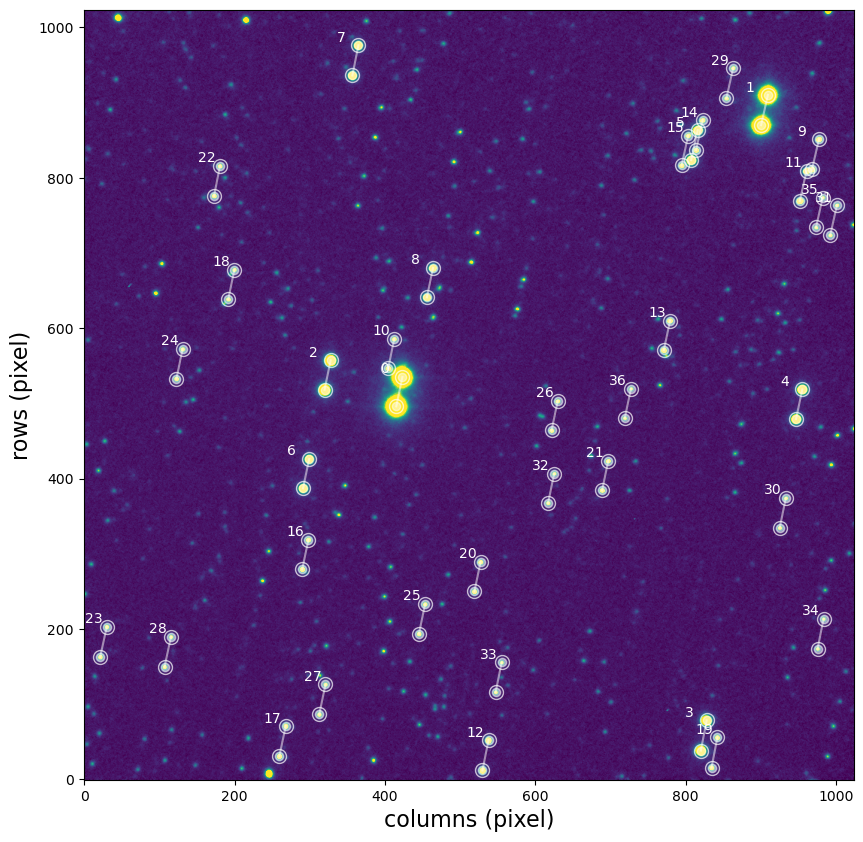

In [15]:
# run stack and reduce individual science images (produce *_proc.fits)
p = s4pipelib.stack_and_reduce_sci_images(p,
                                          pol_l2_list,
                                          reducedir,
                                          stack_suffix=l2_stack_suffix,
                                          force=FORCE,
                                          match_frames=True,
                                          polarimetry=True,
                                          plot=True) 

## Calculate `HALF-WAVE (L/2)` POLARIMETRY

The half-wave ($\lambda/2$) polarimetry is calculated using the [dual beam polarimetry method](https://astropop.readthedocs.io/en/latest/reduction/polarimetry.html). It is executed in two steps. First run the routine ``s4utils.select_polar_sequence`` to automatically identify and select polarimetric sequences from the input list of files.  Then run ``s4pipelib.compute_polarimetry`` for each sequence to obtain the corresponding polarimetric measurements. The results are save into the ``polar.fits`` product FITS file. The polarimetry results can be accessed using the routine ``s4pipelib.get_polarimetry_results``, as in the example below. 

In [16]:
# input reduced files list
red_pol_l2_list = ["{}/{}".format(reducedir, os.path.basename(f).replace(".fits","_proc.fits")) for f in pol_l2_list]
    
# group input list into polarimetric sequences
pol_sequences = s4utils.select_polar_sequences(red_pol_l2_list, 
                                               sortlist=True, 
                                               npos_in_seq=16, 
                                               rolling_seq=False, 
                                               verbose=True)

Sequence 1 of 1 : 16 files for 16 waveplate positions


2024-04-24 20:45:02,869 root - INFO - Number of sources in catalog: 37  [pipeline_lib]


2024-04-24 20:45:02,869 | INFO | Number of sources in catalog: 37


2024-04-24 20:45:02,869 root - INFO - Number of apertures: 6  varying from 6.0 to 16.0 in steps of 2.0 pix  [pipeline_lib]


2024-04-24 20:45:02,869 | INFO | Number of apertures: 6  varying from 6.0 to 16.0 in steps of 2.0 pix


2024-04-24 20:45:02,870 root - INFO - Calculating halfwave polarimetry for aperture 1 of 6  [pipeline_lib]


2024-04-24 20:45:02,870 | INFO | Calculating halfwave polarimetry for aperture 1 of 6


2024-04-24 20:45:03,177 root - INFO - Calculating halfwave polarimetry for aperture 2 of 6  [pipeline_lib]


2024-04-24 20:45:03,177 | INFO | Calculating halfwave polarimetry for aperture 2 of 6


2024-04-24 20:45:03,473 root - INFO - Calculating halfwave polarimetry for aperture 3 of 6  [pipeline_lib]


2024-04-24 20:45:03,473 | INFO | Calculating halfwave polarimetry for aperture 3 of 6


2024-04-24 20:45:03,765 root - INFO - Calculating halfwave polarimetry for aperture 4 of 6  [pipeline_lib]


2024-04-24 20:45:03,765 | INFO | Calculating halfwave polarimetry for aperture 4 of 6


2024-04-24 20:45:04,062 root - INFO - Calculating halfwave polarimetry for aperture 5 of 6  [pipeline_lib]


2024-04-24 20:45:04,062 | INFO | Calculating halfwave polarimetry for aperture 5 of 6


2024-04-24 20:45:04,363 root - INFO - Calculating halfwave polarimetry for aperture 6 of 6  [pipeline_lib]


2024-04-24 20:45:04,363 | INFO | Calculating halfwave polarimetry for aperture 6 of 6


2024-04-24 20:45:04,665 root - INFO - Saving output halfwave polarimetry product: /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606//20230606_s4c4_000019_stdpol_l2_polar.fits  [pipeline_lib]


2024-04-24 20:45:04,665 | INFO | Saving output halfwave polarimetry product: /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606//20230606_s4c4_000019_stdpol_l2_polar.fits


2024-04-24 20:45:05,025 root - INFO - Source index: i=0   [pipeline_lib]


2024-04-24 20:45:05,025 | INFO | Source index: i=0 


2024-04-24 20:45:05,026 root - INFO - Source RA=192.76472566129362 Dec=-61.24386767642334 mag=-19.0837+-0.0002  [pipeline_lib]


2024-04-24 20:45:05,026 | INFO | Source RA=192.76472566129362 Dec=-61.24386767642334 mag=-19.0837+-0.0002


2024-04-24 20:45:05,026 root - INFO - Best aperture radius: 16.0 pixels  [pipeline_lib]


2024-04-24 20:45:05,026 | INFO | Best aperture radius: 16.0 pixels


2024-04-24 20:45:05,027 root - INFO - Polarization in Q: 0.0177+-0.0006  [pipeline_lib]


2024-04-24 20:45:05,027 | INFO | Polarization in Q: 0.0177+-0.0006


2024-04-24 20:45:05,027 root - INFO - Polarization in U: 0.0465+-0.0006  [pipeline_lib]


2024-04-24 20:45:05,027 | INFO | Polarization in U: 0.0465+-0.0006


2024-04-24 20:45:05,027 root - INFO - Polarization in V: nan+-nan  [pipeline_lib]


2024-04-24 20:45:05,027 | INFO | Polarization in V: nan+-nan


2024-04-24 20:45:05,028 root - INFO - Total linear polarization p: 0.0498+-0.0006  [pipeline_lib]


2024-04-24 20:45:05,028 | INFO | Total linear polarization p: 0.0498+-0.0006


2024-04-24 20:45:05,028 root - INFO - Angle of polarization theta: 34.6+-0.4  [pipeline_lib]


2024-04-24 20:45:05,028 | INFO | Angle of polarization theta: 34.6+-0.4


2024-04-24 20:45:05,028 root - INFO - Free constant k: 1+-nan  [pipeline_lib]


2024-04-24 20:45:05,028 | INFO | Free constant k: 1+-nan


2024-04-24 20:45:05,028 root - INFO - Zero of polarization: 0.0+-0.0  [pipeline_lib]


2024-04-24 20:45:05,028 | INFO | Zero of polarization: 0.0+-0.0


2024-04-24 20:45:05,029 root - INFO - RMS of zi residuals: 0.0008036062854023988  [pipeline_lib]


2024-04-24 20:45:05,029 | INFO | RMS of zi residuals: 0.0008036062854023988


2024-04-24 20:45:05,029 root - INFO - Reduced chi-square (n=16.0, DOF=14.0): 7.08  [pipeline_lib]


2024-04-24 20:45:05,029 | INFO | Reduced chi-square (n=16.0, DOF=14.0): 7.08


2024-04-24 20:45:05,073 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2024-04-24 20:45:05,073 | INFO | Substituting symbol \perp from STIXGeneral


2024-04-24 20:45:05,077 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2024-04-24 20:45:05,077 | INFO | Substituting symbol \perp from STIXGeneral


2024-04-24 20:45:05,172 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2024-04-24 20:45:05,172 | INFO | Substituting symbol \perp from STIXGeneral


2024-04-24 20:45:05,176 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2024-04-24 20:45:05,176 | INFO | Substituting symbol \perp from STIXGeneral


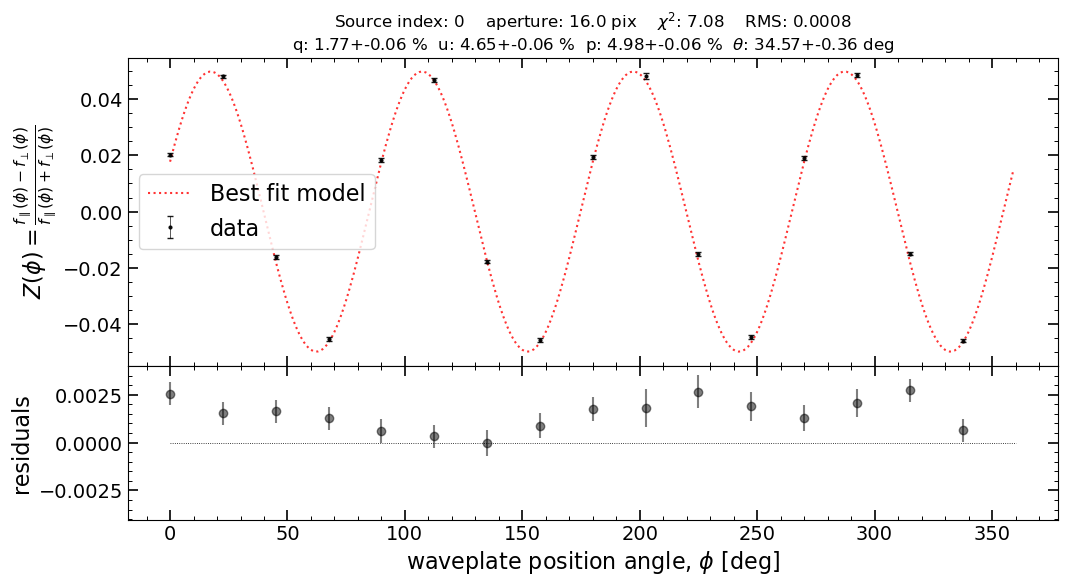

In [17]:
l2_polar_products = []

for i in range(len(pol_sequences)) :    
        
    if len(pol_sequences[i]) == 0 :
        continue
            
    polarproduct = s4pipelib.compute_polarimetry(pol_sequences[i], 
                                                 wppos_key = 'WPPOS',
                                                 wave_plate = 'halfwave',
                                                 base_aperture = p['APERTURE_RADIUS_FOR_PHOTOMETRY_IN_POLAR'],
                                                 compute_k = True,
                                                 fit_zero = False,
                                                 force = FORCE,
                                                 zero = 0)

    pol_results = s4pipelib.get_polarimetry_results(polarproduct,
                                                    source_index=0,
                                                    min_aperture=4,
                                                    max_aperture=25,
                                                    plot=True,
                                                    verbose=True)
    
    l2_polar_products.append(polarproduct)

## Time series of `HALF-WAVE (L/2)` polarimetry data

In this section, we compile all selected polarimetric sequences into a time series product using the routine ``s4pipelib.polar_time_series``. However, for this particular example, since there is only one polarimetric sequence, the time series is not particularly relevant, as it contains only one point in time.

In [22]:
# set suffix for output time series filename
ts_suffix = "{}_s4c{}_{}{}".format(NIGHTDIR,
                                   CHANNEL,
                                   OBJECTID.replace(" ",""), 
                                   polsuffix)    

PolarTimeSeriesProduct = s4pipelib.polar_time_series(l2_polar_products,
                                                     reduce_dir=reducedir,
                                                     ts_suffix=ts_suffix,
                                                     aperture_radius=p['APERTURE_RADIUS_FOR_PHOTOMETRY_IN_POLAR'],
                                                     min_aperture=p['MIN_APERTURE_FOR_POLARIMETRY'],
                                                     max_aperture=p['MAX_APERTURE_FOR_POLARIMETRY'],
                                                     force=FORCE)

2024-04-24 20:47:57,736 root - INFO - Packing time series data for polar file 1 of 1  [pipeline_lib]


2024-04-24 20:47:57,736 | INFO | Packing time series data for polar file 1 of 1


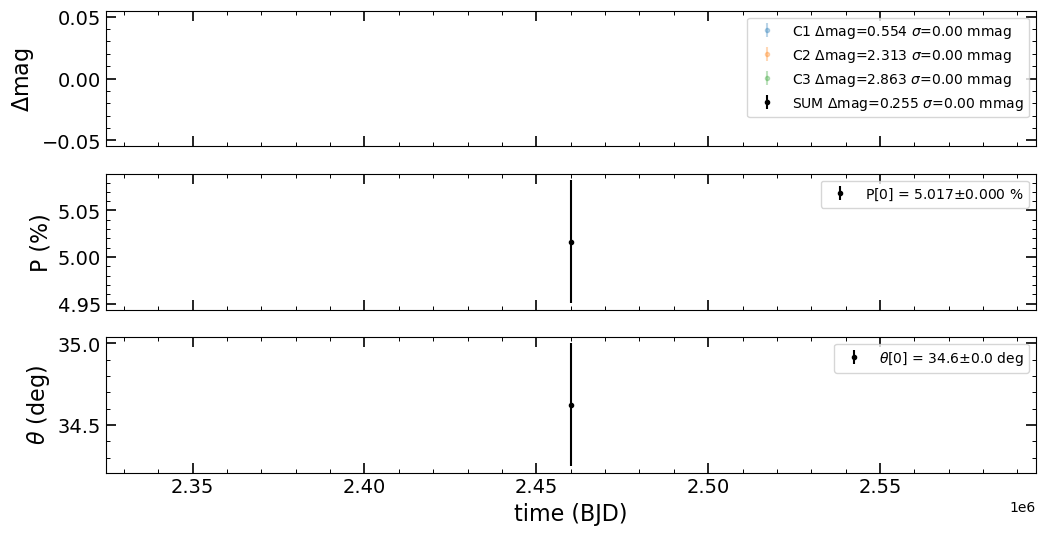

In [23]:
s4plt.plot_polar_time_series(PolarTimeSeriesProduct, 
                             target=0, 
                             comps=[1,2,3], 
                             plot_total_polarization=True, 
                             plot_polarization_angle=True)

## Reduce scientific exposures in `POLARIMETRY QUARTER-WAVE (L/4)` mode

Now repeat all the reduction procedures above for the L/4 data.

In [24]:
# initial set up
polar_mode = p['POLARIMETRY_L4_KEYVALUE']
polsuffix = "_{}_{}".format(inst_mode,polar_mode)

# set suffix for output stack filename
l4_stack_suffix = "{}_s4c{}_{}{}".format(NIGHTDIR, 
                                        CHANNEL, 
                                        OBJECTID.replace(" ",""), 
                                        polsuffix)

# make a list of quarter-wave files (L4)
pol_l4_list = s4utils.select_fits_files_with_keyword(pol_list, 'WPSEL', 'L4')

2024-04-24 20:48:08,946 root - INFO - Reference image: /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000059_stdpol.fits  [pipeline_lib]


2024-04-24 20:48:08,946 | INFO | Reference image: /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000059_stdpol.fits


2024-04-24 20:48:08,974 root - INFO - OBJECT files: 10  [pipeline_lib]


2024-04-24 20:48:08,974 | INFO | OBJECT files: 10


2024-04-24 20:48:08,975 root - INFO - Loading science frames to memory ...   [pipeline_lib]


2024-04-24 20:48:08,975 | INFO | Loading science frames to memory ... 


2024-04-24 20:48:09,119 root - INFO - gain:3.36 electron / adu  [pipeline_lib]


2024-04-24 20:48:09,119 | INFO | gain:3.36 electron / adu


2024-04-24 20:48:09,120 root - INFO - Calibrating science frames (CR, gain, bias, flat) ...   [pipeline_lib]


2024-04-24 20:48:09,120 | INFO | Calibrating science frames (CR, gain, bias, flat) ... 


2024-04-24 20:48:09,120 root - INFO - Calibrating science frame 1 of 10 : 20230606_s4c4_000059_stdpol.fits   [pipeline_lib]


2024-04-24 20:48:09,120 | INFO | Calibrating science frame 1 of 10 : 20230606_s4c4_000059_stdpol.fits 


2024-04-24 20:48:09,492 root - INFO - Calibrating science frame 2 of 10 : 20230606_s4c4_000077_stdpol.fits   [pipeline_lib]


2024-04-24 20:48:09,492 | INFO | Calibrating science frame 2 of 10 : 20230606_s4c4_000077_stdpol.fits 


2024-04-24 20:48:09,859 root - INFO - Calibrating science frame 3 of 10 : 20230606_s4c4_000055_stdpol.fits   [pipeline_lib]


2024-04-24 20:48:09,859 | INFO | Calibrating science frame 3 of 10 : 20230606_s4c4_000055_stdpol.fits 


2024-04-24 20:48:10,257 root - INFO - Calibrating science frame 4 of 10 : 20230606_s4c4_000067_stdpol.fits   [pipeline_lib]


2024-04-24 20:48:10,257 | INFO | Calibrating science frame 4 of 10 : 20230606_s4c4_000067_stdpol.fits 


2024-04-24 20:48:10,659 root - INFO - Calibrating science frame 5 of 10 : 20230606_s4c4_000071_stdpol.fits   [pipeline_lib]


2024-04-24 20:48:10,659 | INFO | Calibrating science frame 5 of 10 : 20230606_s4c4_000071_stdpol.fits 


2024-04-24 20:48:11,046 root - INFO - Calibrating science frame 6 of 10 : 20230606_s4c4_000061_stdpol.fits   [pipeline_lib]


2024-04-24 20:48:11,046 | INFO | Calibrating science frame 6 of 10 : 20230606_s4c4_000061_stdpol.fits 


2024-04-24 20:48:11,434 root - INFO - Calibrating science frame 7 of 10 : 20230606_s4c4_000053_stdpol.fits   [pipeline_lib]


2024-04-24 20:48:11,434 | INFO | Calibrating science frame 7 of 10 : 20230606_s4c4_000053_stdpol.fits 


2024-04-24 20:48:11,799 root - INFO - Calibrating science frame 8 of 10 : 20230606_s4c4_000073_stdpol.fits   [pipeline_lib]


2024-04-24 20:48:11,799 | INFO | Calibrating science frame 8 of 10 : 20230606_s4c4_000073_stdpol.fits 


2024-04-24 20:48:12,171 root - INFO - Calibrating science frame 9 of 10 : 20230606_s4c4_000063_stdpol.fits   [pipeline_lib]


2024-04-24 20:48:12,171 | INFO | Calibrating science frame 9 of 10 : 20230606_s4c4_000063_stdpol.fits 


2024-04-24 20:48:12,545 root - INFO - Calibrating science frame 10 of 10 : 20230606_s4c4_000051_stdpol.fits   [pipeline_lib]


2024-04-24 20:48:12,545 | INFO | Calibrating science frame 10 of 10 : 20230606_s4c4_000051_stdpol.fits 


2024-04-24 20:48:12,911 root - INFO - Registering science frames and stacking them ...   [pipeline_lib]


2024-04-24 20:48:12,911 | INFO | Registering science frames and stacking them ... 


2024-04-24 20:48:12,912 root - INFO - Selected file for stack:0 /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000059_stdpol.fits  [pipeline_lib]


2024-04-24 20:48:12,912 | INFO | Selected file for stack:0 /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000059_stdpol.fits


2024-04-24 20:48:12,913 root - INFO - Selected file for stack:1 /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000077_stdpol.fits  [pipeline_lib]


2024-04-24 20:48:12,913 | INFO | Selected file for stack:1 /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000077_stdpol.fits


2024-04-24 20:48:12,915 root - INFO - Selected file for stack:2 /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000055_stdpol.fits  [pipeline_lib]


2024-04-24 20:48:12,915 | INFO | Selected file for stack:2 /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000055_stdpol.fits


2024-04-24 20:48:12,916 root - INFO - Selected file for stack:3 /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000067_stdpol.fits  [pipeline_lib]


2024-04-24 20:48:12,916 | INFO | Selected file for stack:3 /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000067_stdpol.fits


2024-04-24 20:48:12,918 root - INFO - Selected file for stack:4 /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000071_stdpol.fits  [pipeline_lib]


2024-04-24 20:48:12,918 | INFO | Selected file for stack:4 /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000071_stdpol.fits


2024-04-24 20:48:12,919 root - INFO - Selected file for stack:5 /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000061_stdpol.fits  [pipeline_lib]


2024-04-24 20:48:12,919 | INFO | Selected file for stack:5 /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000061_stdpol.fits


2024-04-24 20:48:12,921 root - INFO - Selected file for stack:6 /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000053_stdpol.fits  [pipeline_lib]


2024-04-24 20:48:12,921 | INFO | Selected file for stack:6 /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000053_stdpol.fits


2024-04-24 20:48:12,923 root - INFO - Selected file for stack:7 /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000073_stdpol.fits  [pipeline_lib]


2024-04-24 20:48:12,923 | INFO | Selected file for stack:7 /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000073_stdpol.fits


2024-04-24 20:48:12,924 root - INFO - Selected file for stack:8 /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000063_stdpol.fits  [pipeline_lib]


2024-04-24 20:48:12,924 | INFO | Selected file for stack:8 /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000063_stdpol.fits


2024-04-24 20:48:12,926 root - INFO - Selected file for stack:9 /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000051_stdpol.fits  [pipeline_lib]


2024-04-24 20:48:12,926 | INFO | Selected file for stack:9 /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000051_stdpol.fits


2024-04-24 20:48:12,928 astropop - INFO - Registering image 1 from 10  [register]


2024-04-24 20:48:12,928 | INFO | Registering image 1 from 10


2024-04-24 20:48:12,931 astropop - INFO - Images are equal, skipping registering.  [register]


2024-04-24 20:48:12,931 | INFO | Images are equal, skipping registering.


2024-04-24 20:48:13,027 astropop - INFO - Registering image 2 from 10  [register]


2024-04-24 20:48:13,027 | INFO | Registering image 2 from 10


2024-04-24 20:48:13,143 astropop - INFO - Filling registered image with cval=37.05  [register]


2024-04-24 20:48:13,143 | INFO | Filling registered image with cval=37.05


2024-04-24 20:48:13,145 astropop - INFO - Registering image with: translation=[-0.25 -0.  ], rotation=0.00°  [register]


2024-04-24 20:48:13,145 | INFO | Registering image with: translation=[-0.25 -0.  ], rotation=0.00°


2024-04-24 20:48:13,305 astropop - INFO - Registering image 3 from 10  [register]


2024-04-24 20:48:13,305 | INFO | Registering image 3 from 10


2024-04-24 20:48:13,401 astropop - INFO - Filling registered image with cval=37.16  [register]


2024-04-24 20:48:13,401 | INFO | Filling registered image with cval=37.16


2024-04-24 20:48:13,403 astropop - INFO - Registering image with: translation=[-1.25  0.25], rotation=0.00°  [register]


2024-04-24 20:48:13,403 | INFO | Registering image with: translation=[-1.25  0.25], rotation=0.00°


2024-04-24 20:48:13,581 astropop - INFO - Registering image 4 from 10  [register]


2024-04-24 20:48:13,581 | INFO | Registering image 4 from 10


2024-04-24 20:48:13,683 astropop - INFO - Filling registered image with cval=36.72  [register]


2024-04-24 20:48:13,683 | INFO | Filling registered image with cval=36.72


2024-04-24 20:48:13,693 astropop - INFO - Registering image with: translation=[-0.5  -1.25], rotation=0.00°  [register]


2024-04-24 20:48:13,693 | INFO | Registering image with: translation=[-0.5  -1.25], rotation=0.00°


2024-04-24 20:48:13,829 astropop - INFO - Registering image 5 from 10  [register]


2024-04-24 20:48:13,829 | INFO | Registering image 5 from 10


2024-04-24 20:48:13,950 astropop - INFO - Filling registered image with cval=37.18  [register]


2024-04-24 20:48:13,950 | INFO | Filling registered image with cval=37.18


2024-04-24 20:48:13,953 astropop - INFO - Registering image with: translation=[-0.5  -1.75], rotation=0.00°  [register]


2024-04-24 20:48:13,953 | INFO | Registering image with: translation=[-0.5  -1.75], rotation=0.00°


2024-04-24 20:48:14,087 astropop - INFO - Registering image 6 from 10  [register]


2024-04-24 20:48:14,087 | INFO | Registering image 6 from 10


2024-04-24 20:48:14,211 astropop - INFO - Filling registered image with cval=37.28  [register]


2024-04-24 20:48:14,211 | INFO | Filling registered image with cval=37.28


2024-04-24 20:48:14,213 astropop - INFO - Registering image with: translation=[-1.25 -1.25], rotation=0.00°  [register]


2024-04-24 20:48:14,213 | INFO | Registering image with: translation=[-1.25 -1.25], rotation=0.00°


2024-04-24 20:48:14,383 astropop - INFO - Registering image 7 from 10  [register]


2024-04-24 20:48:14,383 | INFO | Registering image 7 from 10


2024-04-24 20:48:14,487 astropop - INFO - Filling registered image with cval=37.22  [register]


2024-04-24 20:48:14,487 | INFO | Filling registered image with cval=37.22


2024-04-24 20:48:14,490 astropop - INFO - Registering image with: translation=[-0.  -0.5], rotation=0.00°  [register]


2024-04-24 20:48:14,490 | INFO | Registering image with: translation=[-0.  -0.5], rotation=0.00°


2024-04-24 20:48:14,639 astropop - INFO - Registering image 8 from 10  [register]


2024-04-24 20:48:14,639 | INFO | Registering image 8 from 10


2024-04-24 20:48:14,735 astropop - INFO - Filling registered image with cval=37.14  [register]


2024-04-24 20:48:14,735 | INFO | Filling registered image with cval=37.14


2024-04-24 20:48:14,741 astropop - INFO - Registering image with: translation=[-0.   -1.25], rotation=0.00°  [register]


2024-04-24 20:48:14,741 | INFO | Registering image with: translation=[-0.   -1.25], rotation=0.00°


2024-04-24 20:48:14,891 astropop - INFO - Registering image 9 from 10  [register]


2024-04-24 20:48:14,891 | INFO | Registering image 9 from 10


2024-04-24 20:48:15,013 astropop - INFO - Filling registered image with cval=33.34  [register]


2024-04-24 20:48:15,013 | INFO | Filling registered image with cval=33.34


2024-04-24 20:48:15,022 astropop - INFO - Registering image with: translation=[-0.25 -2.5 ], rotation=0.00°  [register]


2024-04-24 20:48:15,022 | INFO | Registering image with: translation=[-0.25 -2.5 ], rotation=0.00°


2024-04-24 20:48:15,161 astropop - INFO - Registering image 10 from 10  [register]


2024-04-24 20:48:15,161 | INFO | Registering image 10 from 10


2024-04-24 20:48:15,292 astropop - INFO - Filling registered image with cval=36.83  [register]


2024-04-24 20:48:15,292 | INFO | Filling registered image with cval=36.83


2024-04-24 20:48:15,294 astropop - INFO - Registering image with: translation=[-1.   -0.25], rotation=0.00°  [register]


2024-04-24 20:48:15,294 | INFO | Registering image with: translation=[-1.   -0.25], rotation=0.00°


2024-04-24 20:48:15,488 astropop - INFO - Combining 10 images with mean method.  [imcombine]


2024-04-24 20:48:15,488 | INFO | Combining 10 images with mean method.


2024-04-24 20:48:16,793 root - INFO - Creating new catalog of detected sources:  [pipeline_lib]


2024-04-24 20:48:16,793 | INFO | Creating new catalog of detected sources:


2024-04-24 20:48:16,995 root - INFO - Solving astrometry in POLAR-MODE using astrometry_from_existing_wcs()  [pipeline_lib]


2024-04-24 20:48:16,995 | INFO | Solving astrometry in POLAR-MODE using astrometry_from_existing_wcs()


2024-04-24 20:48:16,995 root - INFO - No sky coordinates given, searching sources in online catalogs  [pipeline_lib]


2024-04-24 20:48:16,995 | INFO | No sky coordinates given, searching sources in online catalogs


2024-04-24 20:48:16,996 root - INFO - Querying Gaia DR3 using twirl  [pipeline_lib]


2024-04-24 20:48:16,996 | INFO | Querying Gaia DR3 using twirl


2024-04-24 20:48:18,516 root - INFO - Matching sources with catalog and solving astrometry to compute WCS  [pipeline_lib]


2024-04-24 20:48:18,516 | INFO | Matching sources with catalog and solving astrometry to compute WCS


2024-04-24 20:48:19,284 root - INFO - Running photometry for multiple apertures:  [pipeline_lib]


2024-04-24 20:48:19,284 | INFO | Running photometry for multiple apertures:


2024-04-24 20:48:19,285 root - INFO - Aperture radius of 6 pixels: 1 of 6 :  [pipeline_lib]


2024-04-24 20:48:19,285 | INFO | Aperture radius of 6 pixels: 1 of 6 :


2024-04-24 20:48:19,480 root - INFO - Aperture radius of 8 pixels: 2 of 6 :  [pipeline_lib]


2024-04-24 20:48:19,480 | INFO | Aperture radius of 8 pixels: 2 of 6 :


2024-04-24 20:48:19,678 root - INFO - Aperture radius of 10 pixels: 3 of 6 :  [pipeline_lib]


2024-04-24 20:48:19,678 | INFO | Aperture radius of 10 pixels: 3 of 6 :


2024-04-24 20:48:19,875 root - INFO - Aperture radius of 12 pixels: 4 of 6 :  [pipeline_lib]


2024-04-24 20:48:19,875 | INFO | Aperture radius of 12 pixels: 4 of 6 :


2024-04-24 20:48:20,075 root - INFO - Aperture radius of 14 pixels: 5 of 6 :  [pipeline_lib]


2024-04-24 20:48:20,075 | INFO | Aperture radius of 14 pixels: 5 of 6 :


2024-04-24 20:48:20,279 root - INFO - Aperture radius of 16 pixels: 6 of 6 :  [pipeline_lib]


2024-04-24 20:48:20,279 | INFO | Aperture radius of 16 pixels: 6 of 6 :


2024-04-24 20:48:20,614 root - INFO - The 16 images will be reduced in 1 loops of 100 images each time  [pipeline_lib]


2024-04-24 20:48:20,614 | INFO | The 16 images will be reduced in 1 loops of 100 images each time


2024-04-24 20:48:20,615 root - INFO - Running loop 0 of 1 -> images in loop: 0 to 16 ...   [pipeline_lib]


2024-04-24 20:48:20,615 | INFO | Running loop 0 of 1 -> images in loop: 0 to 16 ... 


2024-04-24 20:48:20,692 root - INFO - OBJECT files: 16  [pipeline_lib]


2024-04-24 20:48:20,692 | INFO | OBJECT files: 16


2024-04-24 20:48:20,692 root - INFO - Creating output list of processed science frames ...   [pipeline_lib]


2024-04-24 20:48:20,692 | INFO | Creating output list of processed science frames ... 


2024-04-24 20:48:20,694 root - INFO - 1 of 16 is reduced? False -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000059_stdpol_proc.fits  [pipeline_lib]


2024-04-24 20:48:20,694 | INFO | 1 of 16 is reduced? False -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000059_stdpol_proc.fits


2024-04-24 20:48:20,694 root - INFO - 2 of 16 is reduced? False -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000077_stdpol_proc.fits  [pipeline_lib]


2024-04-24 20:48:20,694 | INFO | 2 of 16 is reduced? False -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000077_stdpol_proc.fits


2024-04-24 20:48:20,695 root - INFO - 3 of 16 is reduced? False -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000055_stdpol_proc.fits  [pipeline_lib]


2024-04-24 20:48:20,695 | INFO | 3 of 16 is reduced? False -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000055_stdpol_proc.fits


2024-04-24 20:48:20,696 root - INFO - 4 of 16 is reduced? False -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000067_stdpol_proc.fits  [pipeline_lib]


2024-04-24 20:48:20,696 | INFO | 4 of 16 is reduced? False -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000067_stdpol_proc.fits


2024-04-24 20:48:20,696 root - INFO - 5 of 16 is reduced? False -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000071_stdpol_proc.fits  [pipeline_lib]


2024-04-24 20:48:20,696 | INFO | 5 of 16 is reduced? False -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000071_stdpol_proc.fits


2024-04-24 20:48:20,697 root - INFO - 6 of 16 is reduced? False -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000061_stdpol_proc.fits  [pipeline_lib]


2024-04-24 20:48:20,697 | INFO | 6 of 16 is reduced? False -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000061_stdpol_proc.fits


2024-04-24 20:48:20,698 root - INFO - 7 of 16 is reduced? False -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000053_stdpol_proc.fits  [pipeline_lib]


2024-04-24 20:48:20,698 | INFO | 7 of 16 is reduced? False -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000053_stdpol_proc.fits


2024-04-24 20:48:20,698 root - INFO - 8 of 16 is reduced? False -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000073_stdpol_proc.fits  [pipeline_lib]


2024-04-24 20:48:20,698 | INFO | 8 of 16 is reduced? False -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000073_stdpol_proc.fits


2024-04-24 20:48:20,699 root - INFO - 9 of 16 is reduced? False -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000063_stdpol_proc.fits  [pipeline_lib]


2024-04-24 20:48:20,699 | INFO | 9 of 16 is reduced? False -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000063_stdpol_proc.fits


2024-04-24 20:48:20,700 root - INFO - 10 of 16 is reduced? False -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000051_stdpol_proc.fits  [pipeline_lib]


2024-04-24 20:48:20,700 | INFO | 10 of 16 is reduced? False -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000051_stdpol_proc.fits


2024-04-24 20:48:20,700 root - INFO - 11 of 16 is reduced? False -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000081_stdpol_proc.fits  [pipeline_lib]


2024-04-24 20:48:20,700 | INFO | 11 of 16 is reduced? False -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000081_stdpol_proc.fits


2024-04-24 20:48:20,701 root - INFO - 12 of 16 is reduced? False -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000075_stdpol_proc.fits  [pipeline_lib]


2024-04-24 20:48:20,701 | INFO | 12 of 16 is reduced? False -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000075_stdpol_proc.fits


2024-04-24 20:48:20,702 root - INFO - 13 of 16 is reduced? False -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000069_stdpol_proc.fits  [pipeline_lib]


2024-04-24 20:48:20,702 | INFO | 13 of 16 is reduced? False -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000069_stdpol_proc.fits


2024-04-24 20:48:20,702 root - INFO - 14 of 16 is reduced? False -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000057_stdpol_proc.fits  [pipeline_lib]


2024-04-24 20:48:20,702 | INFO | 14 of 16 is reduced? False -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000057_stdpol_proc.fits


2024-04-24 20:48:20,703 root - INFO - 15 of 16 is reduced? False -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000079_stdpol_proc.fits  [pipeline_lib]


2024-04-24 20:48:20,703 | INFO | 15 of 16 is reduced? False -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000079_stdpol_proc.fits


2024-04-24 20:48:20,704 root - INFO - 16 of 16 is reduced? False -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000065_stdpol_proc.fits  [pipeline_lib]


2024-04-24 20:48:20,704 | INFO | 16 of 16 is reduced? False -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000065_stdpol_proc.fits


2024-04-24 20:48:20,704 root - INFO - Loading science frames to memory ...   [pipeline_lib]


2024-04-24 20:48:20,704 | INFO | Loading science frames to memory ... 


2024-04-24 20:48:20,900 root - INFO - gain:3.36 electron / adu  [pipeline_lib]


2024-04-24 20:48:20,900 | INFO | gain:3.36 electron / adu


2024-04-24 20:48:20,900 root - INFO - Calibrating science frames (CR, gain, bias, flat) ...   [pipeline_lib]


2024-04-24 20:48:20,900 | INFO | Calibrating science frames (CR, gain, bias, flat) ... 


2024-04-24 20:48:20,901 root - INFO - Calibrating science frame 1 of 16 : 20230606_s4c4_000059_stdpol.fits   [pipeline_lib]


2024-04-24 20:48:20,901 | INFO | Calibrating science frame 1 of 16 : 20230606_s4c4_000059_stdpol.fits 


2024-04-24 20:48:21,280 root - INFO - Calibrating science frame 2 of 16 : 20230606_s4c4_000077_stdpol.fits   [pipeline_lib]


2024-04-24 20:48:21,280 | INFO | Calibrating science frame 2 of 16 : 20230606_s4c4_000077_stdpol.fits 


2024-04-24 20:48:21,654 root - INFO - Calibrating science frame 3 of 16 : 20230606_s4c4_000055_stdpol.fits   [pipeline_lib]


2024-04-24 20:48:21,654 | INFO | Calibrating science frame 3 of 16 : 20230606_s4c4_000055_stdpol.fits 


2024-04-24 20:48:22,024 root - INFO - Calibrating science frame 4 of 16 : 20230606_s4c4_000067_stdpol.fits   [pipeline_lib]


2024-04-24 20:48:22,024 | INFO | Calibrating science frame 4 of 16 : 20230606_s4c4_000067_stdpol.fits 


2024-04-24 20:48:22,388 root - INFO - Calibrating science frame 5 of 16 : 20230606_s4c4_000071_stdpol.fits   [pipeline_lib]


2024-04-24 20:48:22,388 | INFO | Calibrating science frame 5 of 16 : 20230606_s4c4_000071_stdpol.fits 


2024-04-24 20:48:22,760 root - INFO - Calibrating science frame 6 of 16 : 20230606_s4c4_000061_stdpol.fits   [pipeline_lib]


2024-04-24 20:48:22,760 | INFO | Calibrating science frame 6 of 16 : 20230606_s4c4_000061_stdpol.fits 


2024-04-24 20:48:23,110 root - INFO - Calibrating science frame 7 of 16 : 20230606_s4c4_000053_stdpol.fits   [pipeline_lib]


2024-04-24 20:48:23,110 | INFO | Calibrating science frame 7 of 16 : 20230606_s4c4_000053_stdpol.fits 


2024-04-24 20:48:23,487 root - INFO - Calibrating science frame 8 of 16 : 20230606_s4c4_000073_stdpol.fits   [pipeline_lib]


2024-04-24 20:48:23,487 | INFO | Calibrating science frame 8 of 16 : 20230606_s4c4_000073_stdpol.fits 


2024-04-24 20:48:23,854 root - INFO - Calibrating science frame 9 of 16 : 20230606_s4c4_000063_stdpol.fits   [pipeline_lib]


2024-04-24 20:48:23,854 | INFO | Calibrating science frame 9 of 16 : 20230606_s4c4_000063_stdpol.fits 


2024-04-24 20:48:24,221 root - INFO - Calibrating science frame 10 of 16 : 20230606_s4c4_000051_stdpol.fits   [pipeline_lib]


2024-04-24 20:48:24,221 | INFO | Calibrating science frame 10 of 16 : 20230606_s4c4_000051_stdpol.fits 


2024-04-24 20:48:24,594 root - INFO - Calibrating science frame 11 of 16 : 20230606_s4c4_000081_stdpol.fits   [pipeline_lib]


2024-04-24 20:48:24,594 | INFO | Calibrating science frame 11 of 16 : 20230606_s4c4_000081_stdpol.fits 


2024-04-24 20:48:24,961 root - INFO - Calibrating science frame 12 of 16 : 20230606_s4c4_000075_stdpol.fits   [pipeline_lib]


2024-04-24 20:48:24,961 | INFO | Calibrating science frame 12 of 16 : 20230606_s4c4_000075_stdpol.fits 


2024-04-24 20:48:25,352 root - INFO - Calibrating science frame 13 of 16 : 20230606_s4c4_000069_stdpol.fits   [pipeline_lib]


2024-04-24 20:48:25,352 | INFO | Calibrating science frame 13 of 16 : 20230606_s4c4_000069_stdpol.fits 


2024-04-24 20:48:25,725 root - INFO - Calibrating science frame 14 of 16 : 20230606_s4c4_000057_stdpol.fits   [pipeline_lib]


2024-04-24 20:48:25,725 | INFO | Calibrating science frame 14 of 16 : 20230606_s4c4_000057_stdpol.fits 


2024-04-24 20:48:26,104 root - INFO - Calibrating science frame 15 of 16 : 20230606_s4c4_000079_stdpol.fits   [pipeline_lib]


2024-04-24 20:48:26,104 | INFO | Calibrating science frame 15 of 16 : 20230606_s4c4_000079_stdpol.fits 


2024-04-24 20:48:26,479 root - INFO - Calibrating science frame 16 of 16 : 20230606_s4c4_000065_stdpol.fits   [pipeline_lib]


2024-04-24 20:48:26,479 | INFO | Calibrating science frame 16 of 16 : 20230606_s4c4_000065_stdpol.fits 


2024-04-24 20:48:26,858 root - INFO - Calculating offsets ...   [pipeline_lib]


2024-04-24 20:48:26,858 | INFO | Calculating offsets ... 


2024-04-24 20:48:26,859 root - INFO - Computing offsets with respect to the reference image: index=0 -> /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000059_stdpol.fits  [pipeline_lib]


2024-04-24 20:48:26,859 | INFO | Computing offsets with respect to the reference image: index=0 -> /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000059_stdpol.fits


2024-04-24 20:48:26,861 astropop - INFO - Computing shift of image 1 from 16  [register]


2024-04-24 20:48:26,861 | INFO | Computing shift of image 1 from 16


2024-04-24 20:48:26,862 astropop - INFO - Computing shift of image 2 from 16  [register]


2024-04-24 20:48:26,862 | INFO | Computing shift of image 2 from 16


2024-04-24 20:48:26,907 astropop - INFO - Computing shift of image 3 from 16  [register]


2024-04-24 20:48:26,907 | INFO | Computing shift of image 3 from 16


2024-04-24 20:48:26,988 astropop - INFO - Computing shift of image 4 from 16  [register]


2024-04-24 20:48:26,988 | INFO | Computing shift of image 4 from 16


2024-04-24 20:48:27,071 astropop - INFO - Computing shift of image 5 from 16  [register]


2024-04-24 20:48:27,071 | INFO | Computing shift of image 5 from 16


2024-04-24 20:48:27,156 astropop - INFO - Computing shift of image 6 from 16  [register]


2024-04-24 20:48:27,156 | INFO | Computing shift of image 6 from 16


2024-04-24 20:48:27,228 astropop - INFO - Computing shift of image 7 from 16  [register]


2024-04-24 20:48:27,228 | INFO | Computing shift of image 7 from 16


2024-04-24 20:48:27,303 astropop - INFO - Computing shift of image 8 from 16  [register]


2024-04-24 20:48:27,303 | INFO | Computing shift of image 8 from 16


2024-04-24 20:48:27,388 astropop - INFO - Computing shift of image 9 from 16  [register]


2024-04-24 20:48:27,388 | INFO | Computing shift of image 9 from 16


2024-04-24 20:48:27,475 astropop - INFO - Computing shift of image 10 from 16  [register]


2024-04-24 20:48:27,475 | INFO | Computing shift of image 10 from 16


2024-04-24 20:48:27,565 astropop - INFO - Computing shift of image 11 from 16  [register]


2024-04-24 20:48:27,565 | INFO | Computing shift of image 11 from 16


2024-04-24 20:48:27,653 astropop - INFO - Computing shift of image 12 from 16  [register]


2024-04-24 20:48:27,653 | INFO | Computing shift of image 12 from 16


2024-04-24 20:48:27,742 astropop - INFO - Computing shift of image 13 from 16  [register]


2024-04-24 20:48:27,742 | INFO | Computing shift of image 13 from 16


2024-04-24 20:48:27,848 astropop - INFO - Computing shift of image 14 from 16  [register]


2024-04-24 20:48:27,848 | INFO | Computing shift of image 14 from 16


2024-04-24 20:48:27,925 astropop - INFO - Computing shift of image 15 from 16  [register]


2024-04-24 20:48:27,925 | INFO | Computing shift of image 15 from 16


2024-04-24 20:48:28,019 astropop - INFO - Computing shift of image 16 from 16  [register]


2024-04-24 20:48:28,019 | INFO | Computing shift of image 16 from 16


2024-04-24 20:48:28,100 root - INFO - Processing file: 20230606_s4c4_000059_stdpol.fits  [pipeline_lib]


2024-04-24 20:48:28,100 | INFO | Processing file: 20230606_s4c4_000059_stdpol.fits


2024-04-24 20:48:28,104 root - INFO - Exposure time: 3.00 s; Readout noise: 6.55 e-  [pipeline_lib]


2024-04-24 20:48:28,104 | INFO | Exposure time: 3.00 s; Readout noise: 6.55 e-


2024-04-24 20:48:28,146 root - INFO - Running aperture photometry for catalogs with an offset of dx=0.0 dy=0.0  [pipeline_lib]


2024-04-24 20:48:28,146 | INFO | Running aperture photometry for catalogs with an offset of dx=0.0 dy=0.0


2024-04-24 20:48:29,459 root - INFO - Saving frame 1 of 16: /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000059_stdpol.fits -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000059_stdpol_proc.fits  [pipeline_lib]


2024-04-24 20:48:29,459 | INFO | Saving frame 1 of 16: /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000059_stdpol.fits -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000059_stdpol_proc.fits


2024-04-24 20:48:29,545 root - INFO - Processing file: 20230606_s4c4_000077_stdpol.fits  [pipeline_lib]


2024-04-24 20:48:29,545 | INFO | Processing file: 20230606_s4c4_000077_stdpol.fits


2024-04-24 20:48:29,546 root - INFO - Exposure time: 3.00 s; Readout noise: 6.55 e-  [pipeline_lib]


2024-04-24 20:48:29,546 | INFO | Exposure time: 3.00 s; Readout noise: 6.55 e-


2024-04-24 20:48:29,562 root - INFO - Running aperture photometry for catalogs with an offset of dx=-0.25 dy=-0.0  [pipeline_lib]


2024-04-24 20:48:29,562 | INFO | Running aperture photometry for catalogs with an offset of dx=-0.25 dy=-0.0


2024-04-24 20:48:30,758 root - INFO - Saving frame 2 of 16: /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000077_stdpol.fits -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000077_stdpol_proc.fits  [pipeline_lib]


2024-04-24 20:48:30,758 | INFO | Saving frame 2 of 16: /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000077_stdpol.fits -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000077_stdpol_proc.fits


2024-04-24 20:48:30,846 root - INFO - Processing file: 20230606_s4c4_000055_stdpol.fits  [pipeline_lib]


2024-04-24 20:48:30,846 | INFO | Processing file: 20230606_s4c4_000055_stdpol.fits


2024-04-24 20:48:30,847 root - INFO - Exposure time: 3.00 s; Readout noise: 6.55 e-  [pipeline_lib]


2024-04-24 20:48:30,847 | INFO | Exposure time: 3.00 s; Readout noise: 6.55 e-


2024-04-24 20:48:30,866 root - INFO - Running aperture photometry for catalogs with an offset of dx=-1.25 dy=0.25  [pipeline_lib]


2024-04-24 20:48:30,866 | INFO | Running aperture photometry for catalogs with an offset of dx=-1.25 dy=0.25


2024-04-24 20:48:32,123 root - INFO - Saving frame 3 of 16: /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000055_stdpol.fits -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000055_stdpol_proc.fits  [pipeline_lib]


2024-04-24 20:48:32,123 | INFO | Saving frame 3 of 16: /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000055_stdpol.fits -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000055_stdpol_proc.fits


2024-04-24 20:48:32,210 root - INFO - Processing file: 20230606_s4c4_000067_stdpol.fits  [pipeline_lib]


2024-04-24 20:48:32,210 | INFO | Processing file: 20230606_s4c4_000067_stdpol.fits


2024-04-24 20:48:32,211 root - INFO - Exposure time: 3.00 s; Readout noise: 6.55 e-  [pipeline_lib]


2024-04-24 20:48:32,211 | INFO | Exposure time: 3.00 s; Readout noise: 6.55 e-


2024-04-24 20:48:32,228 root - INFO - Running aperture photometry for catalogs with an offset of dx=-0.5 dy=-1.25  [pipeline_lib]


2024-04-24 20:48:32,228 | INFO | Running aperture photometry for catalogs with an offset of dx=-0.5 dy=-1.25


2024-04-24 20:48:33,411 root - INFO - Saving frame 4 of 16: /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000067_stdpol.fits -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000067_stdpol_proc.fits  [pipeline_lib]


2024-04-24 20:48:33,411 | INFO | Saving frame 4 of 16: /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000067_stdpol.fits -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000067_stdpol_proc.fits


2024-04-24 20:48:33,497 root - INFO - Processing file: 20230606_s4c4_000071_stdpol.fits  [pipeline_lib]


2024-04-24 20:48:33,497 | INFO | Processing file: 20230606_s4c4_000071_stdpol.fits


2024-04-24 20:48:33,498 root - INFO - Exposure time: 3.00 s; Readout noise: 6.55 e-  [pipeline_lib]


2024-04-24 20:48:33,498 | INFO | Exposure time: 3.00 s; Readout noise: 6.55 e-


2024-04-24 20:48:33,513 root - INFO - Running aperture photometry for catalogs with an offset of dx=-0.5 dy=-1.75  [pipeline_lib]


2024-04-24 20:48:33,513 | INFO | Running aperture photometry for catalogs with an offset of dx=-0.5 dy=-1.75


2024-04-24 20:48:34,723 root - INFO - Saving frame 5 of 16: /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000071_stdpol.fits -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000071_stdpol_proc.fits  [pipeline_lib]


2024-04-24 20:48:34,723 | INFO | Saving frame 5 of 16: /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000071_stdpol.fits -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000071_stdpol_proc.fits


2024-04-24 20:48:34,810 root - INFO - Processing file: 20230606_s4c4_000061_stdpol.fits  [pipeline_lib]


2024-04-24 20:48:34,810 | INFO | Processing file: 20230606_s4c4_000061_stdpol.fits


2024-04-24 20:48:34,811 root - INFO - Exposure time: 3.00 s; Readout noise: 6.55 e-  [pipeline_lib]


2024-04-24 20:48:34,811 | INFO | Exposure time: 3.00 s; Readout noise: 6.55 e-


2024-04-24 20:48:34,827 root - INFO - Running aperture photometry for catalogs with an offset of dx=-1.25 dy=-1.25  [pipeline_lib]


2024-04-24 20:48:34,827 | INFO | Running aperture photometry for catalogs with an offset of dx=-1.25 dy=-1.25


2024-04-24 20:48:36,005 root - INFO - Saving frame 6 of 16: /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000061_stdpol.fits -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000061_stdpol_proc.fits  [pipeline_lib]


2024-04-24 20:48:36,005 | INFO | Saving frame 6 of 16: /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000061_stdpol.fits -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000061_stdpol_proc.fits


2024-04-24 20:48:36,092 root - INFO - Processing file: 20230606_s4c4_000053_stdpol.fits  [pipeline_lib]


2024-04-24 20:48:36,092 | INFO | Processing file: 20230606_s4c4_000053_stdpol.fits


2024-04-24 20:48:36,094 root - INFO - Exposure time: 3.00 s; Readout noise: 6.55 e-  [pipeline_lib]


2024-04-24 20:48:36,094 | INFO | Exposure time: 3.00 s; Readout noise: 6.55 e-


2024-04-24 20:48:36,110 root - INFO - Running aperture photometry for catalogs with an offset of dx=-0.0 dy=-0.5  [pipeline_lib]


2024-04-24 20:48:36,110 | INFO | Running aperture photometry for catalogs with an offset of dx=-0.0 dy=-0.5


2024-04-24 20:48:37,287 root - INFO - Saving frame 7 of 16: /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000053_stdpol.fits -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000053_stdpol_proc.fits  [pipeline_lib]


2024-04-24 20:48:37,287 | INFO | Saving frame 7 of 16: /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000053_stdpol.fits -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000053_stdpol_proc.fits


2024-04-24 20:48:37,372 root - INFO - Processing file: 20230606_s4c4_000073_stdpol.fits  [pipeline_lib]


2024-04-24 20:48:37,372 | INFO | Processing file: 20230606_s4c4_000073_stdpol.fits


2024-04-24 20:48:37,373 root - INFO - Exposure time: 3.00 s; Readout noise: 6.55 e-  [pipeline_lib]


2024-04-24 20:48:37,373 | INFO | Exposure time: 3.00 s; Readout noise: 6.55 e-


2024-04-24 20:48:37,389 root - INFO - Running aperture photometry for catalogs with an offset of dx=-0.0 dy=-1.25  [pipeline_lib]


2024-04-24 20:48:37,389 | INFO | Running aperture photometry for catalogs with an offset of dx=-0.0 dy=-1.25


2024-04-24 20:48:38,570 root - INFO - Saving frame 8 of 16: /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000073_stdpol.fits -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000073_stdpol_proc.fits  [pipeline_lib]


2024-04-24 20:48:38,570 | INFO | Saving frame 8 of 16: /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000073_stdpol.fits -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000073_stdpol_proc.fits


2024-04-24 20:48:38,657 root - INFO - Processing file: 20230606_s4c4_000063_stdpol.fits  [pipeline_lib]


2024-04-24 20:48:38,657 | INFO | Processing file: 20230606_s4c4_000063_stdpol.fits


2024-04-24 20:48:38,658 root - INFO - Exposure time: 3.00 s; Readout noise: 6.55 e-  [pipeline_lib]


2024-04-24 20:48:38,658 | INFO | Exposure time: 3.00 s; Readout noise: 6.55 e-


2024-04-24 20:48:38,674 root - INFO - Running aperture photometry for catalogs with an offset of dx=-0.25 dy=-2.5  [pipeline_lib]


2024-04-24 20:48:38,674 | INFO | Running aperture photometry for catalogs with an offset of dx=-0.25 dy=-2.5


2024-04-24 20:48:39,864 root - INFO - Saving frame 9 of 16: /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000063_stdpol.fits -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000063_stdpol_proc.fits  [pipeline_lib]


2024-04-24 20:48:39,864 | INFO | Saving frame 9 of 16: /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000063_stdpol.fits -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000063_stdpol_proc.fits


2024-04-24 20:48:39,950 root - INFO - Processing file: 20230606_s4c4_000051_stdpol.fits  [pipeline_lib]


2024-04-24 20:48:39,950 | INFO | Processing file: 20230606_s4c4_000051_stdpol.fits


2024-04-24 20:48:39,951 root - INFO - Exposure time: 3.00 s; Readout noise: 6.55 e-  [pipeline_lib]


2024-04-24 20:48:39,951 | INFO | Exposure time: 3.00 s; Readout noise: 6.55 e-


2024-04-24 20:48:39,967 root - INFO - Running aperture photometry for catalogs with an offset of dx=-1.0 dy=-0.25  [pipeline_lib]


2024-04-24 20:48:39,967 | INFO | Running aperture photometry for catalogs with an offset of dx=-1.0 dy=-0.25


2024-04-24 20:48:41,193 root - INFO - Saving frame 10 of 16: /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000051_stdpol.fits -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000051_stdpol_proc.fits  [pipeline_lib]


2024-04-24 20:48:41,193 | INFO | Saving frame 10 of 16: /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000051_stdpol.fits -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000051_stdpol_proc.fits


2024-04-24 20:48:41,283 root - INFO - Processing file: 20230606_s4c4_000081_stdpol.fits  [pipeline_lib]


2024-04-24 20:48:41,283 | INFO | Processing file: 20230606_s4c4_000081_stdpol.fits


2024-04-24 20:48:41,284 root - INFO - Exposure time: 3.00 s; Readout noise: 6.55 e-  [pipeline_lib]


2024-04-24 20:48:41,284 | INFO | Exposure time: 3.00 s; Readout noise: 6.55 e-


2024-04-24 20:48:41,300 root - INFO - Running aperture photometry for catalogs with an offset of dx=-0.25 dy=-1.25  [pipeline_lib]


2024-04-24 20:48:41,300 | INFO | Running aperture photometry for catalogs with an offset of dx=-0.25 dy=-1.25


2024-04-24 20:48:42,513 root - INFO - Saving frame 11 of 16: /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000081_stdpol.fits -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000081_stdpol_proc.fits  [pipeline_lib]


2024-04-24 20:48:42,513 | INFO | Saving frame 11 of 16: /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000081_stdpol.fits -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000081_stdpol_proc.fits


2024-04-24 20:48:42,600 root - INFO - Processing file: 20230606_s4c4_000075_stdpol.fits  [pipeline_lib]


2024-04-24 20:48:42,600 | INFO | Processing file: 20230606_s4c4_000075_stdpol.fits


2024-04-24 20:48:42,601 root - INFO - Exposure time: 3.00 s; Readout noise: 6.55 e-  [pipeline_lib]


2024-04-24 20:48:42,601 | INFO | Exposure time: 3.00 s; Readout noise: 6.55 e-


2024-04-24 20:48:42,617 root - INFO - Running aperture photometry for catalogs with an offset of dx=-0.5 dy=-0.5  [pipeline_lib]


2024-04-24 20:48:42,617 | INFO | Running aperture photometry for catalogs with an offset of dx=-0.5 dy=-0.5


2024-04-24 20:48:43,818 root - INFO - Saving frame 12 of 16: /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000075_stdpol.fits -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000075_stdpol_proc.fits  [pipeline_lib]


2024-04-24 20:48:43,818 | INFO | Saving frame 12 of 16: /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000075_stdpol.fits -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000075_stdpol_proc.fits


2024-04-24 20:48:43,903 root - INFO - Processing file: 20230606_s4c4_000069_stdpol.fits  [pipeline_lib]


2024-04-24 20:48:43,903 | INFO | Processing file: 20230606_s4c4_000069_stdpol.fits


2024-04-24 20:48:43,904 root - INFO - Exposure time: 3.00 s; Readout noise: 6.55 e-  [pipeline_lib]


2024-04-24 20:48:43,904 | INFO | Exposure time: 3.00 s; Readout noise: 6.55 e-


2024-04-24 20:48:43,921 root - INFO - Running aperture photometry for catalogs with an offset of dx=-0.5 dy=-0.75  [pipeline_lib]


2024-04-24 20:48:43,921 | INFO | Running aperture photometry for catalogs with an offset of dx=-0.5 dy=-0.75


2024-04-24 20:48:45,105 root - INFO - Saving frame 13 of 16: /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000069_stdpol.fits -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000069_stdpol_proc.fits  [pipeline_lib]


2024-04-24 20:48:45,105 | INFO | Saving frame 13 of 16: /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000069_stdpol.fits -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000069_stdpol_proc.fits


2024-04-24 20:48:45,195 root - INFO - Processing file: 20230606_s4c4_000057_stdpol.fits  [pipeline_lib]


2024-04-24 20:48:45,195 | INFO | Processing file: 20230606_s4c4_000057_stdpol.fits


2024-04-24 20:48:45,196 root - INFO - Exposure time: 3.00 s; Readout noise: 6.55 e-  [pipeline_lib]


2024-04-24 20:48:45,196 | INFO | Exposure time: 3.00 s; Readout noise: 6.55 e-


2024-04-24 20:48:45,212 root - INFO - Running aperture photometry for catalogs with an offset of dx=-1.0 dy=0.25  [pipeline_lib]


2024-04-24 20:48:45,212 | INFO | Running aperture photometry for catalogs with an offset of dx=-1.0 dy=0.25


2024-04-24 20:48:46,396 root - INFO - Saving frame 14 of 16: /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000057_stdpol.fits -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000057_stdpol_proc.fits  [pipeline_lib]


2024-04-24 20:48:46,396 | INFO | Saving frame 14 of 16: /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000057_stdpol.fits -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000057_stdpol_proc.fits


2024-04-24 20:48:46,484 root - INFO - Processing file: 20230606_s4c4_000079_stdpol.fits  [pipeline_lib]


2024-04-24 20:48:46,484 | INFO | Processing file: 20230606_s4c4_000079_stdpol.fits


2024-04-24 20:48:46,485 root - INFO - Exposure time: 3.00 s; Readout noise: 6.55 e-  [pipeline_lib]


2024-04-24 20:48:46,485 | INFO | Exposure time: 3.00 s; Readout noise: 6.55 e-


2024-04-24 20:48:46,501 root - INFO - Running aperture photometry for catalogs with an offset of dx=1.25 dy=0.25  [pipeline_lib]


2024-04-24 20:48:46,501 | INFO | Running aperture photometry for catalogs with an offset of dx=1.25 dy=0.25


2024-04-24 20:48:47,678 root - INFO - Saving frame 15 of 16: /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000079_stdpol.fits -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000079_stdpol_proc.fits  [pipeline_lib]


2024-04-24 20:48:47,678 | INFO | Saving frame 15 of 16: /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000079_stdpol.fits -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000079_stdpol_proc.fits


2024-04-24 20:48:47,763 root - INFO - Processing file: 20230606_s4c4_000065_stdpol.fits  [pipeline_lib]


2024-04-24 20:48:47,763 | INFO | Processing file: 20230606_s4c4_000065_stdpol.fits


2024-04-24 20:48:47,764 root - INFO - Exposure time: 3.00 s; Readout noise: 6.55 e-  [pipeline_lib]


2024-04-24 20:48:47,764 | INFO | Exposure time: 3.00 s; Readout noise: 6.55 e-


2024-04-24 20:48:47,779 root - INFO - Running aperture photometry for catalogs with an offset of dx=-0.5 dy=-1.5  [pipeline_lib]


2024-04-24 20:48:47,779 | INFO | Running aperture photometry for catalogs with an offset of dx=-0.5 dy=-1.5


2024-04-24 20:48:48,958 root - INFO - Saving frame 16 of 16: /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000065_stdpol.fits -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000065_stdpol_proc.fits  [pipeline_lib]


2024-04-24 20:48:48,958 | INFO | Saving frame 16 of 16: /Users/eder/Data/SPARC4/minidata//sparc4acs4/20230606/20230606_s4c4_000065_stdpol.fits -> /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606/20230606_s4c4_000065_stdpol_proc.fits


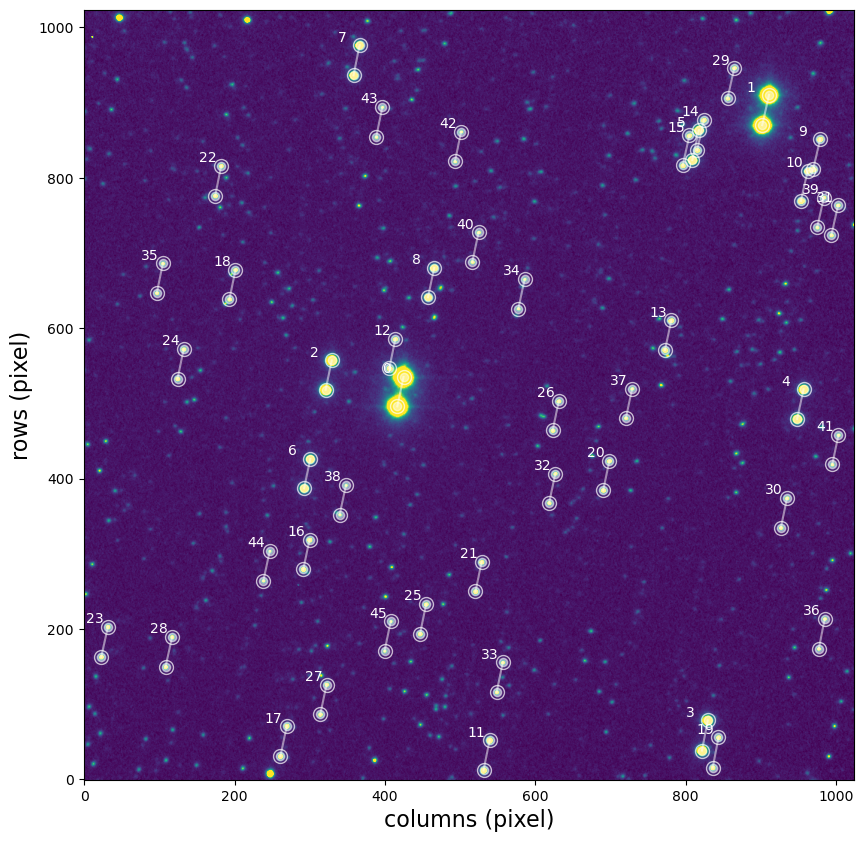

In [26]:
# run stack and reduce individual science images (produce *_proc.fits)
p = s4pipelib.stack_and_reduce_sci_images(p,
                                          pol_l4_list,
                                          reducedir,
                                          stack_suffix=l4_stack_suffix,
                                          force=FORCE,
                                          match_frames=True,
                                          polarimetry=True,                                              
                                          plot=True) 

## Calculate `QUARTER-WAVE (L/4)` POLARIMETRY

The quarter-wave ($\lambda/4$) polarimetry is calculated using the [dual beam polarimetry method](https://astropop.readthedocs.io/en/latest/reduction/polarimetry.html). It is executed in two steps. First run the routine ``s4utils.select_polar_sequence`` to automatically identify and select polarimetric sequences from the input list of files.  Then run ``s4pipelib.compute_polarimetry`` for each sequence to obtain the corresponding polarimetric measurements. The results are save into the ``polar.fits`` product FITS file. The polarimetry results can be accessed using the routine ``s4pipelib.get_polarimetry_results``, as in the example below. 

In [27]:
# input reduced files list
red_pol_l4_list = ["{}/{}".format(reducedir, os.path.basename(f).replace(".fits","_proc.fits")) for f in pol_l4_list]
    
# group input list into polarimetric sequences
pol_sequences = s4utils.select_polar_sequences(red_pol_l4_list, 
                                               sortlist=True, 
                                               npos_in_seq=16, 
                                               rolling_seq=False, 
                                               verbose=True)

Sequence 1 of 1 : 16 files for 16 waveplate positions


2024-04-24 20:48:50,031 root - INFO - Number of sources in catalog: 46  [pipeline_lib]


2024-04-24 20:48:50,031 | INFO | Number of sources in catalog: 46


2024-04-24 20:48:50,031 root - INFO - Number of apertures: 6  varying from 6.0 to 16.0 in steps of 2.0 pix  [pipeline_lib]


2024-04-24 20:48:50,031 | INFO | Number of apertures: 6  varying from 6.0 to 16.0 in steps of 2.0 pix


2024-04-24 20:48:50,031 astropop - INFO - Normalization disabled.  [__init__]


2024-04-24 20:48:50,031 | INFO | Normalization disabled.


2024-04-24 20:48:50,032 root - INFO - Calculating quarterwave polarimetry for aperture 1 of 6  [pipeline_lib]


2024-04-24 20:48:50,032 | INFO | Calculating quarterwave polarimetry for aperture 1 of 6


2024-04-24 20:48:50,537 root - INFO - Calculating quarterwave polarimetry for aperture 2 of 6  [pipeline_lib]


2024-04-24 20:48:50,537 | INFO | Calculating quarterwave polarimetry for aperture 2 of 6


2024-04-24 20:48:51,068 root - INFO - Calculating quarterwave polarimetry for aperture 3 of 6  [pipeline_lib]


2024-04-24 20:48:51,068 | INFO | Calculating quarterwave polarimetry for aperture 3 of 6


2024-04-24 20:48:51,215 root - WARNING - Could not calculate polarimetry for source_index=9 and aperture=10.0 pixels: Optimal parameters not found: The maximum number of function evaluations is exceeded.  [pipeline_lib]


2024-04-24 20:48:51,215 | WARNING | Could not calculate polarimetry for source_index=9 and aperture=10.0 pixels: Optimal parameters not found: The maximum number of function evaluations is exceeded.


2024-04-24 20:48:51,650 root - INFO - Calculating quarterwave polarimetry for aperture 4 of 6  [pipeline_lib]


2024-04-24 20:48:51,650 | INFO | Calculating quarterwave polarimetry for aperture 4 of 6


2024-04-24 20:48:51,799 root - WARNING - Could not calculate polarimetry for source_index=9 and aperture=12.0 pixels: Optimal parameters not found: The maximum number of function evaluations is exceeded.  [pipeline_lib]


2024-04-24 20:48:51,799 | WARNING | Could not calculate polarimetry for source_index=9 and aperture=12.0 pixels: Optimal parameters not found: The maximum number of function evaluations is exceeded.


2024-04-24 20:48:52,235 root - INFO - Calculating quarterwave polarimetry for aperture 5 of 6  [pipeline_lib]


2024-04-24 20:48:52,235 | INFO | Calculating quarterwave polarimetry for aperture 5 of 6


2024-04-24 20:48:52,440 root - WARNING - Could not calculate polarimetry for source_index=12 and aperture=14.0 pixels: Optimal parameters not found: The maximum number of function evaluations is exceeded.  [pipeline_lib]


2024-04-24 20:48:52,440 | WARNING | Could not calculate polarimetry for source_index=12 and aperture=14.0 pixels: Optimal parameters not found: The maximum number of function evaluations is exceeded.


2024-04-24 20:48:52,864 root - INFO - Calculating quarterwave polarimetry for aperture 6 of 6  [pipeline_lib]


2024-04-24 20:48:52,864 | INFO | Calculating quarterwave polarimetry for aperture 6 of 6


2024-04-24 20:48:53,457 root - INFO - Saving output quarterwave polarimetry product: /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606//20230606_s4c4_000051_stdpol_l4_polar.fits  [pipeline_lib]


2024-04-24 20:48:53,457 | INFO | Saving output quarterwave polarimetry product: /Users/eder/Data/SPARC4/minidata/reduced//sparc4acs4//20230606//20230606_s4c4_000051_stdpol_l4_polar.fits


2024-04-24 20:48:53,807 astropop - INFO - Normalization disabled.  [__init__]


2024-04-24 20:48:53,807 | INFO | Normalization disabled.


2024-04-24 20:48:53,810 root - INFO - Source index: i=0   [pipeline_lib]


2024-04-24 20:48:53,810 | INFO | Source index: i=0 


2024-04-24 20:48:53,810 root - INFO - Source RA=192.7647172866264 Dec=-61.243852801702545 mag=-19.2580+-0.0002  [pipeline_lib]


2024-04-24 20:48:53,810 | INFO | Source RA=192.7647172866264 Dec=-61.243852801702545 mag=-19.2580+-0.0002


2024-04-24 20:48:53,810 root - INFO - Best aperture radius: 16.0 pixels  [pipeline_lib]


2024-04-24 20:48:53,810 | INFO | Best aperture radius: 16.0 pixels


2024-04-24 20:48:53,811 root - INFO - Polarization in Q: -0.062+-0.002  [pipeline_lib]


2024-04-24 20:48:53,811 | INFO | Polarization in Q: -0.062+-0.002


2024-04-24 20:48:53,811 root - INFO - Polarization in U: -0+-9  [pipeline_lib]


2024-04-24 20:48:53,811 | INFO | Polarization in U: -0+-9


2024-04-24 20:48:53,812 root - INFO - Polarization in V: -0.000+-0.002  [pipeline_lib]


2024-04-24 20:48:53,812 | INFO | Polarization in V: -0.000+-0.002


2024-04-24 20:48:53,812 root - INFO - Total linear polarization p: 0.062+-0.002  [pipeline_lib]


2024-04-24 20:48:53,812 | INFO | Total linear polarization p: 0.062+-0.002


2024-04-24 20:48:53,812 root - INFO - Angle of polarization theta: 90.0+-0.8  [pipeline_lib]


2024-04-24 20:48:53,812 | INFO | Angle of polarization theta: 90.0+-0.8


2024-04-24 20:48:53,812 root - INFO - Free constant k: 1+-nan  [pipeline_lib]


2024-04-24 20:48:53,812 | INFO | Free constant k: 1+-nan


2024-04-24 20:48:53,813 root - INFO - Zero of polarization: 0+-2000  [pipeline_lib]


2024-04-24 20:48:53,813 | INFO | Zero of polarization: 0+-2000


2024-04-24 20:48:53,813 root - INFO - RMS of zi residuals: 0.0030423804368348677  [pipeline_lib]


2024-04-24 20:48:53,813 | INFO | RMS of zi residuals: 0.0030423804368348677


2024-04-24 20:48:53,813 root - INFO - Reduced chi-square (n=16.0, DOF=12.0): 50.71  [pipeline_lib]


2024-04-24 20:48:53,813 | INFO | Reduced chi-square (n=16.0, DOF=12.0): 50.71


2024-04-24 20:48:53,863 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2024-04-24 20:48:53,863 | INFO | Substituting symbol \perp from STIXGeneral


2024-04-24 20:48:53,866 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2024-04-24 20:48:53,866 | INFO | Substituting symbol \perp from STIXGeneral


2024-04-24 20:48:53,970 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2024-04-24 20:48:53,970 | INFO | Substituting symbol \perp from STIXGeneral


2024-04-24 20:48:53,973 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2024-04-24 20:48:53,973 | INFO | Substituting symbol \perp from STIXGeneral


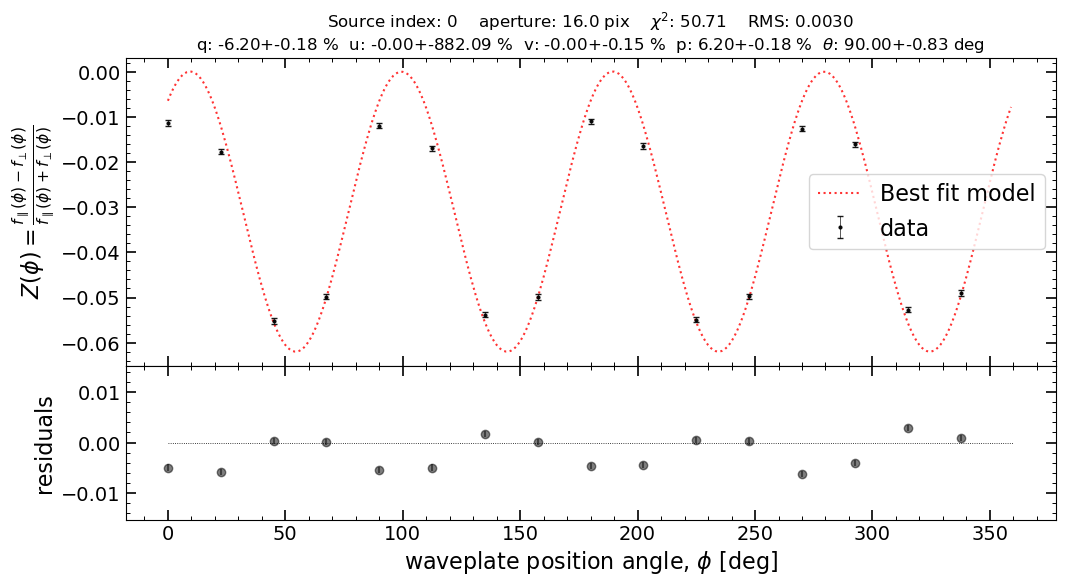

In [28]:
l4_polar_products = []

for i in range(len(pol_sequences)) :    
        
    if len(pol_sequences[i]) == 0 :
        continue
            
    polarproduct = s4pipelib.compute_polarimetry(pol_sequences[i], 
                                                 wppos_key='WPPOS',
                                                 wave_plate = 'quarterwave',
                                                 base_aperture = p['APERTURE_RADIUS_FOR_PHOTOMETRY_IN_POLAR'],
                                                 compute_k = False,
                                                 fit_zero = True,
                                                 force=FORCE,
                                                 zero = 0)

    pol_results = s4pipelib.get_polarimetry_results(polarproduct,
                                                    source_index=0,
                                                    min_aperture=4,
                                                    max_aperture=25,
                                                    plot=True,
                                                    verbose=True)
    l4_polar_products.append(polarproduct)    

## Time series of `QUARTER-WAVE (L/4)` polarimetry data

In [ ]:
# set suffix for output time series filename
ts_suffix = "{}_s4c{}_{}{}".format(NIGHTDIR,
                                   CHANNEL,
                                   OBJECTID.replace(" ",""), 
                                   polsuffix)   

PolarTimeSeriesProduct = s4pipelib.polar_time_series(l4_polar_products,
                                                     reduce_dir=reducedir,
                                                     ts_suffix=ts_suffix,
                                                     aperture_radius=p['APERTURE_RADIUS_FOR_PHOTOMETRY_IN_POLAR'],
                                                     min_aperture=p['MIN_APERTURE_FOR_POLARIMETRY'],
                                                     max_aperture=p['MAX_APERTURE_FOR_POLARIMETRY'],
                                                     force=FORCE)

In [ ]:
s4plt.plot_polar_time_series(PolarTimeSeriesProduct, 
                             target=0, 
                             comps=[1,2,3], 
                             plot_total_polarization=True, 
                             plot_polarization_angle=True)